In [1]:
# LINEAR Regression on Precision table

In [7]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

In [8]:
def sk_linearReg_org(data):          
    data_set = [[value[0], value[1], value[2], value[3]] for value in data]
    Y = [value[4] for value in data]
    clf = linear_model.LinearRegression()
    clf.fit(data_set, Y)

    # application of the model to the data
    model = [clf.intercept_+ np.sum(np.array(clf.coef_)*np.array(value)) for value in data_set]  
    # calculation of the residuals
    res = np.array(Y)-np.array(model)    
    
    return [clf.intercept_, clf.coef_, model, res]

def sk_linearReg(data_set, Y):          
    # data_set = [[value[0], value[1], value[2], value[3]] for value in data]
    # Y = [value[4] for value in data]
    clf = linear_model.LinearRegression()
    clf.fit(data_set, Y)

    # application of the model to the data
    print("intercept=",clf.intercept_,"coef", clf.coef_)
    df = data_set.copy()
    df = df.multiply(clf.coef_, axis=1)
    print("model")
    model = clf.intercept_ + df.sum(axis=1)
    display(model.head())
    #model = [clf.intercept_+ np.sum(np.array(clf.coef_)*np.array(value)) for value in data_set]  
    # calculation of the residuals
    res = Y.values - model.values    
    
    return [clf.intercept_, clf.coef_, model, res]

In [6]:
# Using float quality from random forest

# df = pd.read_csv("../metalicities/extended_quality.csv")
df = pd.read_csv("random_forest/float_quality.csv")

df.columns = df.columns.str.strip()
#df.Resolution = df.Resolution.str.replace("k","").astype(float) * 1000
#df.Band = df.Band.str.strip()
#df = df[df.Band =="K"]
print(df.head())
len(df)

   Temp  logg  [Fe/H]  Alpha  Band  Resolution  vsini  Sampling  Quality  \
0  4200   4.0    -1.0    0.0  0.90       60000    1.0       3.0     2899   
1  4200   4.0    -1.0    0.0  0.90       60000    5.0       3.0     1946   
2  4200   4.0    -1.0    0.0  0.90       60000   10.0       3.0     1141   
3  4200   4.0    -1.0    0.0  1.25       60000    1.0       3.0     1543   
4  4200   4.0    -1.0    0.0  1.25       60000    5.0       3.0     1090   

   Cond1  Cond2  Cond3  correctflag  
0   12.1   20.4   12.6            0  
1   18.1   30.6   18.7            0  
2   30.8   50.2   31.6            0  
3   22.2  111.9   23.5            0  
4   31.4  186.9   33.2            0  


7200

In [5]:
# TODO apply the scaling/normalization to columns

In [9]:
data_table = df[["Temp", "logg", "[Fe/H]", "Resolution", "Band", "vsini"]]
expected = df["Quality"].astype(float)
data_table = data_table.astype(np.float)

In [7]:
[intercept_, coef_, model, res] = sk_linearReg(data_table, expected)

intercept= 20408.446173711713 coef [-2.99193627e+00 -5.05856000e+02  1.05706931e+03  4.21585140e-02
 -2.24870695e+03 -6.73343385e+02]
model


0    4594.151754
1    1900.778215
2   -1465.938707
3    3807.104321
4    1113.730783
dtype: float64

In [8]:
print(data_table.columns)
print(coef_)

Index(['Temp', 'logg', '[Fe/H]', 'Resolution', 'Band', 'vsini'], dtype='object')
[-2.99193627e+00 -5.05856000e+02  1.05706931e+03  4.21585140e-02
 -2.24870695e+03 -6.73343385e+02]


In [9]:
import matplotlib.pyplot as plt
plt.style.use('presentation')
plt.hist(res)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAewAAAFcCAYAAAAK4I0VAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvXtcVNe5//+ZGwMDzAwy3B28IaCIRgNaAU9j1Ig2jcaeSlJN25jY803aGnMa4zltYpvk5Nta0+Z2mvwaj0naE5uYNBf6zQUTo6YiXiAYg+igAsJwZwbmAnO//P7Y7MXeey7MwCBI9vv1yivO3rPXXmvtYT/redZzEXi9Xi94eHh4eHh4JjXCie4ADw8PDw8Pz8jwApuHh4eHh+cGgBfYPDw8PDw8NwC8wObh4eHh4bkB4AU2Dw8PDw/PDQAvsHl4eHh4eG4AeIHNw8PDw8NzA8ALbB4eHh4enhsAXmDz8HDQarXIycnB/v37fc7l5ORgz549Aa+tr6/Hvffe63O8qqoKO3bsiEj/ItkWDbPf49H+jQg/DzyTDfFEd4CHZ7LyySefYPv27eRzRUVF2G3s27cPu3btQlFREdRqdUT6FWpb9L3Hq/2pDj8PPJMNXsPm4fGDWq2GyWSCyWQix6qqqrB27dqw2nn77bcBUFp7VVVVRPoWalv0vcer/akOPw88kw1eYPPwBGDt2rX45JNPyOeqqioUFxeTfzPNpfv37/cxoe/YsQMmk4n8/+TJkwCAe++9l6Wt33vvvaiqqsK+fftQWFiIwsJC0nZ9fT127NiBHTt2EFM8sy0Afq9j3hsADh06hNWrV2P16tVBTfrc9un779mzB6tXr8amTZvIIiZQm6GOg8bfuWBt0/2g5zyc63fs2EH6xnwG/o5z53n//v0+bQabHx6eSMMLbB6eAKxfv568vOvr6zF//vywrn/hhRcgl8vxwgsvsI6XlZXh448/BkAJhQsXLmDBggU4deoUqqurUV1djba2NqLdHT58GP/2b/+GJ5980uceJpPJ73XMe9fX12P//v147733cOTIEQCU4AuVw4cPo6ysDEeOHMH06dNx6NChgG0G6s9I42CeC9R2VVUVTp06hSNHjuD111/HoUOHYDAYQr7+0KFDAIDq6mq8/vrr5BkEOs6kqqoKhw4dIm1qtVpynb/54eEZD/g9bB6eAOTl5UGr1QIAPv74Y6xfvx5Go3HM7ZaWluLxxx8HQO2Tb968GXK5HK+//jqqqqpQX18PrVYLk8kEhUKBvLw85OXl+W0r0HVMPv74YxiNRvz4xz8GQAn5cPZm1Wo1uX9xcTFMJlPANkc7Dua5QG2bzWaUlZWRcTO3J0K5fv369di/fz/27NmD0tJSspBasGCB3+NMTp48ibKyMsjlcgDA9u3b8dZbb2HBggV+54eHZzzgBTYPTxCKiopQUVFBNDimiZyJwWCAUqkMud3ly5cTre35559HfX09HnroIWzfvh2lpaVkoQAACoUiYDvBrqNRKpXYvHkzywEtHKHiT7gHanO042CeC9T2M8884/M9WsMO5Xq5XI4jR46goqICFRUV2LNnD44cOYK8vDy/x0fCbDYHnB8envGAN4nz8AShtLQUr7zyCuRyOdGuAEpAXLx4kXw+fPhwWO3S2h5AvfCrqqpQVFSEsrIyKBSKkJ2dQrmutLQUhw8fJkJ6x44dYzbbBmpztOMIpe2ioiJWvwONIdD1+/fvx759+1BaWoonn3wSRqMRJpMp4HEmxcXFrPvt378fpaWlYY+Nh2cs8AKbhycIRUVFqK+vx7p161jH8/LyUFRUhNWrV+Pee+/F9u3b/WpaarXab1x2aWkpqqqqiIm3rKwMFy5cwOrVq/HYY4+hrKwMzzzzzIj9C3YdfW+1Wo3t27dj06ZNKCwshFKpZIWrjYZAbY52HKG0XVpaivnz5xPnrvnz5/u1agTr26lTp1BYWIjVq1fjkUcegVwuD3icCb0IoZ3O1Go1eXY8PNcLgdfr9U50J3h4eHhGor6+HlVVVWSxsWnTJjzyyCMoKiqa4J7x8FwfeIHNw8Nzw7Bjxw5cvHgRcrkcy5cvH1ViGB6eGxVeYPPw8PDw8NwAjOsetlarZSWXoGMpmQkmxnKMh4eHh4fnm8K4CmxmJqGKigoolUoUFRXBYDCQEIrRHuPh4eHh4fkmMW4Cu6KighX2UFVVRbxo8/PzUVVVNaZjwXC53OMxJB4eHh4engljXBKn1NfXIy8vj5XMQKvVEqErl8tJQoWxHAtEf78lgqMBkpLi0dtrjmibk4GpOi5g6o5tqo4L4Md2IzJVxwVM3NiSkuIDnhsXgf3MM89ArVbDYDDg1KlTOHToENRqNbRaLfLy8lipEcdyjIeHh4eH55vCuAjs1157DQCVDpBOnlBRUUE047q6OpSWlsJkMo36GA8PDw/P5EbT0g8AyJ2RMME9mRpct0xnpaWlMBgMZP+5qKhoTMd4eHh4eCY35ZXNKK9snuhuTBmmZBx2pPcdpuo+zVQdFzB1xzZVxwXwY7sR8TcuTUs/WrvNOHdFhwYtVZwlR63EhpJZIWnaXK18orT0b8weNg8PDw/PNxNao956WzYeP3CW+vfaHGSoYsO6nhbQ3M+hMFVN8bzA5uHh4eEZM5qWfpRXNhOt+rl3zqNoQSpUimjUaHqQUTIrrOt/feAMIBBA2zMAANh7sDZkLX00Qv5GgBfYPDw8PDxjJndGAuJlEqJVry5QY+3STABAtaYn7Ot/smEB4PWGpaVzhf7eg7VYPFeFzJT4KSG8eYHNw8PDwxMRqjU9uKN4JgDA5hhOYFWYmxz29TWaHni9XtbnkbR0rtDfujYHbxxuwLkrurBN6l1GO1IV0pCvuR7wApuHh4eHJyJkJMUR4RyKVh3K9eG2Rwt9ndGK594+D73JBiB8k7okSoR///6isMcwnvACm4eHh4cnIjA16VC16lCvD7U9ptA/fLYVh45eBTB6k3qoQv56cN3isHl4eHh4eMYbpmC32l24o3gm7iieiZoQ99G33pZNPm9dmwNg2Ot8ouE1bB4eHh6eKcloTPS0ST02VooaTc+kChHjNWweHh4ennFH09J/3TXV0ZjoM5LisHHFbOTPUaH6UjcatAY0aA3Ye7B2wjVtXmDz8PDw8Iw7N0qaUlqw52ep8MDGBeT41rU5E65l8ybxG5zHHtuN48c/D3i+srLmOvYmMGYzleIvPj5w2r2R2LZtK1atWoMtW34UqW7x8PCMM5PJkStc8zY3zGyksLLxhhfYU4Ds7Fzs3v3YRHcjKI8/vhvZ2bl48MEdE90VHh6e64i/2OhQ05RGmnAzoI01TC3S8AI7gkyUc4JcLkdOTu51vScPDw9PqERKUw30jh3p3TtaLX+sYWqRht/DjiCTdY+muvoMSkoK0N7eRo7t3Pkg7r33XgBAe3sbdu58EO3tbdi2bStKSgqwbdtWVFefYbXz0ksvYPPmDSgpKcDOnQ+ioUHDOv/73z+N0tKVKC1did///mlyfNu2raipOYu//e2v2LZta0jtmc1m7Nz5IEpLV2Lz5g0oL38vonPCw8MTOUZyKKMduTaumI30MWjXgd6xI717/YVrTfR+9GjgNewIMNF7NCaTyUd4AkBcXBwyMqajsHAZ7rjjTjz++H/g1VffwLFjR6DRXMKxY0dht1Pfrak5i4cf/im2bPkR0tMzUF7+Hh5++Kc4dOgDZGRMx86dD8JkMmHXrl9CLlegvPxd3HffVnKeFsRPPfU7DAyY8fLLL2Lnzgfx3HMv4dVX38DOnQ+yTOIjtff979+B9PQMPPXU7wAA+/b9X3R0tGPVqjXXZU55eHhCZyRT80ia6mg1ZPreobx7J9t+9GjgBXYEmOg9msuXNbjvvq0+xwsKluK5514CADz66K9QWroSL730Av7xj/exe/evIJfLWfVet2z5ETZs2AQAKCxchm3btuLgwb9gy5YfoabmLD755BhxGnv00V9Bo7mE48c/R3Z2Li5f1rDOx8XF4+DBv/jtb3t7W9D20tMzMDBgxvPPv0zOP/vsn1BWtjFCM8bDwxMJ6q7q8JcP68esrIwk8IO9Y0N99460Hz2Z4q0DwQvsCDGRqzemYA7GU0/9Dg8//FPccssqrFy52m873M81NWdx+TKlva9bt9LnmvT0DPJ/pgd4YeEyFBYu89uPkdozGo3Izs5ltZeRMZ3ci4eHZ3KQn6Uadd1rIDzrZKB3bKjv3pG0/BuhJCcvsCPEZPMm9MfAAKVNd3S0h3VdXBwlOAOFiAXSpEfb3ksvvRBWezw8PBPHWJSVcKyTgd6xY333Blo0JCX5D0GdSE2cdzqLEJPNm5CL2WzG3r1PY9euX6Kjo92vkK2pOevzOT09g2i23H3ynTsfxLFjR5CenoGOjnYSaw1Qjm6lpb4aNIAR25s3bz4uX9aw2mtvbwt7ocHDwzP+jNahjHZUowX+SPm+ue9Y+vqxvnvDdUibSOficdOw9+3bh4sXL6KoqAjbt28nx4qLi1FfXx+RYzwUgZzOAJBwr8cf342CgqXYsGET0tMz8PDDP8X3vrcB0dFK8t2XX34RAJCbOx/l5e/i8mUNnnrqd8jImI5bblmFhx56ALt3/wpxcfEoL38PGs0lPPXUMsTHxyM9PQMPPfQAHnjg58TpLDd3HqsvtFAPtz2AcjqjNXMeHp7Jw2gFJi30br15+qg05EiasEOxEky0czEACLxerzfSjWq1WqjVagDApk2b8N5776GiogJarRbbt2/Hvn37kJ+fT747mmOlpaUB7890pIoESUnxEW8zUoyU6ezAgTeg0VzEyy+/iHfe+QfZF37ssd3o7e3Cn//8F7S3t6GsbCOeffZPePnlF3H5sgbZ2bl44IGfs/ahX3rpBRw//jk6OtpRULAUDzywgywIKA3+v4iWfuutq/HAAzvI/Y4dO4K9e59GenoGXn31jZDae/zx3dBoLkEul2PLlh9hYMCM7OzcgHvjTCbzMxsLU3VcAD+2G5Fg4woWM80UfDlqZViCb6zX+6Na08NaNBTmJqPLaIfBYGG12947QMz3T92/bFyciwOZ4oFxEtg09fX1uHDhAsrKyrBnzx4UFRWhtLQUFRUVqKqqAoBRH3vyyScD3tflckMsFo3XsKYcWq0Wq1evRnV1NeRy+UR3h4dnSlB3VQeAcsz6JvKfL1UCAH77YInPuZYuE3627xgA4E+7ViIzNbz3zliv9wf3efnr/98OD1syBQDuXnt9E1aNm0lcq9Xiz3/+My5evIiysjKW1i2Xy6HVagFgTMcC0d9viehYpvrqWK8fAADodAOw2wUT3KvIMNWf2VRkqo3tLx/WAwB2b1kyqrHdCGFG3HFpWvrR2m3GuSs6ogE/8twXPhrwp1XNxAT96alrJKaaO+ZAcxDo+rFAP68NJbNYGvwjz32BxXNVyEyJh1ImYWni4/F7DaZhj5vTmVqtxgsvvID58+ejvr4earWaCFqTyQS1Wj2mYzw8PDyTEU1LP/YerGWVZaS1t3BgOjdNRGnK0VBe2YxzV3QjOnEFclTjOnQFcvAK5ugW7lxxn1d5ZTOK81NZ/T93RYfyyuYJdy4e97AuWuAWFRURoVtXV4fS0lKYTKZRH+OJHBkZ0ydNVS8enhsdf6FKACUYQtGW/Tk3WewuyKTiSattc/v83DvnUbQgFSpFtF8nLn8e38zrf33gDCAQQNtDWf+4Dl7BBCfTGS2YlYJ5jvu8qi914+7bctDSYcBzb5+H3mTz24/rzbgIbHqfuaioCMXFxZDL5SgtLcW+fftYe9IAxnSMh4eHZzLC9Tpu7DTB6XCH9KLnChC70x1QcIXDeJrYuX1eXaDG2qWZAELz/OZe/5MNCwCvN6yELOEudJiCnfm8Kk63IFERjR+szUVvrxmHz7bi0NGrIfdjPBlXp7OJ4pvkJT4Wpuq4gKk7tqk6LuDGHxtTINKexpqWfrzxaQM69JRfTagezR+caCL/NlucOHaOykEwFs/kvQdrAVB76pGC+cyYfRYIBMhRUyGjoS4QuNczRZNAIAhpn5rpxT0zNR7Xuqi+Mefdn5d5TqYSG1fMBgA8tv804mVReGbnt9Hba/bpVyT2y4MRbA+bz3TGw8PDEwGYGhttps2dkYAHNi4IO3UnM3vXS+/XjSnt8fWKH+ZmHItE7elw47OZmrLZ4iQCmznvgbKr0fPUobcAegv+86VKrB+yEuRmJpCF2EQi+s1vfvObCe3BOGCxOCLaXmysNOJtTgam6riAqTu2qTou4MYdm6alHwc+uoQGrQF6kw2aln6oFNFQKWMAAEdr27BkXgpmp8ajU29BbubIAowl1AUCrLp5OnJnJMBscRLhojPayD2CoVLGYFZaPNHSd25ehNnpkQnfZD4z86ADOqMNOqMNFWdaA85HIJjjWpSlIu2plDEhLXLoa2lNuVrTjeL8NORkKn3m/WhtG3Iylaxz3Hn69f3fQlpCDLXYaTWgZGGaTz/CeQ6hEhsrDXiO17B5eHh4xsBI+bAzkuKwfsUc9PaaR6Wh+XOwCkV75ZromVq6OUxzdSjQfdq9ZUlADXakezLHFa6GXl7ZDIvNidxM6toBi5MhvNnzHij/OHOe3jt2FW3d5qCWietdMITfww6BG31vLRBTdVzA1B3bVB0XcGOPbaR9TubYxuL8FU6WL+aeNTeT19Ev28i5sZCUFI8TNa0+fUpUREOliAYwPB/B9tC544qRimC1u0cco79rhQLAMyTV1EmxuHt1dshzzZynhg4T4iRCn8xm/mLNI5FtjWZC4rB5eHh4vimEUwBjLMUjQilU4S8OPD5GQs4d/bKNdW6s8d3++rQoS0Xmw+v1+vSHe09uG/fdPj/oGLnXMuOmPQwVVCQSspKwjDTW+BgJ+U7Jogy/hUlCjTUfD3gNOwRu5JV/MKbquICpO7apOi5g6o/NnyY6Gq0sFK/lYDmvI5EPmxZqKwoycaKmFZV1nT4adaj98TeuhlYDcjKVrPaCWSb+58OLsNic+OqqHgCgjIuCYYDaW89RK7F4rgonL3RBJhUHtSowrQBJSfH4+EQj0bg/ONGEhlYDeX6JcilyMhOgUkRH1Huc17CnMJs3b0BJSUHAal2PPbYbJSUFYdes5rJt29aQ2ygpKUB19Zkx3Y+HZ6oRbhnHQISizQcrWRlqOctgMK0E5ZXNuNZpCtqnUO7JHNeM1Hif9oJZJq51mqDtGcAdxTMxO12OxXOTyLni/DSUn2yGtmcgoIYfKDsdU+PeuGI26/mtLlDj/tvnh11WdCzwTmdThPLyd/Hoo7/yOR6skhfP9eNGyAvNM/6EUsZxJEJJjxnIqWqkcyPB3S8u+9VHsNhcAIadsgL1KVBoFP23QQvH3BkJuGvVXHI+PkZChCnzPsyYajrOvaHVgH/99hwcrW3DHcUzoTNaUV7ZTPbDAaA4P9Xv32Fxfiq5x9a1OcjPUuGR576g+j70febzszmG27xeaUp5gT0FyM7OxdGjR3wE9rFjR/ga0pOE6+1NyjM5GYuwDIdgQn0s+bC5HvEP370ET782cox5Q6sBDa0GVow6DVdr5v6NBPPCD3TObHWS+zAzla1cnAG9ye7Tv/LKZuiMVla2s0PHrvosEq7X8wsEL7CnAKtWrcHLL7+IhgYNqScNAJ9//hnuuONOv1r273//NI4f/xwejxe5ufOwa9cvkZExHYD/WtRcgtWy5hlmMhS955k8jCQsJ7Mlhu6bprWfCLbyLxqDWgwC/f4B+Hha0+w9WEuqY/nTbLn38XeOObdWuwsFOUmIkgjhcLpZ5mtu/xpaDdhQMgtmqxN5c5NICU9maBptBZiI4h/8HvYU4ZZbVqG8/F3WsePHP8eqVbf5fHfnzgdRU3MWzz//PJ566ncAgPvuu4ec//7374DJZMJTT/0Ou3b9EgcP/gWXL2t8rt+165c4cOANpKdn4L77tqK9vW2cRnfjEql9S56JhelhPJ6Vs8biQT4WQhkT3TfmXrMiLgq5mQkB93ED/f79eVozv0NXx2K1xbgPt7/B+pCRFIcH78yH3mhHc6eJJWgD9S8+RoL3jl3FHcUzUbQgBRWnW1hzMFHwGvYUYcOGTXj88f8gZnHaHM7VehsaNKipOYtDhz7ATTfNQ2+vGYWFy1BauhLl5e9BLpdjYMCM559/GfHxlDn92Wf/hLKyjQCA9vY21NScxSefHCPnH330V9BoLuH48c/9auPfdCKxb3mjEgmNcaxthFpjORhjSegRah+51aqK89Nw21BqzPEmWIUrbt8Aal85d0YCjIMOlFc2B9U4uYU1dEabT1UvndEKAQRIVEj9VsfimtRpb+7cGQlBze10XwPtgTP7pzNaUXG6BffdPp9KwuJw4Yl7l+LXr56FccAetI3rBS+wpwiFhcsAANXVZ1BYuIyYw7loNBcRFxdPzN80ubnz0NBwCXFx8cjOziXCGKDKb6anZwAA0bTXrVvp0zb9HR42E73vNZFEQriFWi4x1D6E0yeusPrps18QByZ/plvmdeH0k7sXKxIJce6Kjgjs8TKVa1r68ebnV1jVwPrMNkRHifHEtqXkvltvy2btE5sHHSELMO7vPz1RRtpaOEeFwtxkmK1OANQ2AXPPuTg/jdU/btlN7vPw1wfu3Bbnp/n0kcqOZoDOaGWNi9n+NPmwkxlzH/16bmPwAnsKceutq3Hs2BEUFi7D8eOf48CBNyJ+D9qJja+fHTqRKnqvaelHl9GOVEXgXMOThWB7l8DohGW4daHDrbHsD+7L/r7b5+O/360DQL203zjcgHNXdD5tjGahUq3pQdGCFDS0GkjRCrqPY134BBIquTMSIBIKyGe7041ew7B2S893TqaSZSXaUDIraDpWJtzf/wcnmkhbJ+u60KEbZMVGW+0ucl5vsrH6xy27yX0egfrA1PLLK5uhUkSTuTh3uRef1WiJYI6XRZHrEuKksNopD/RegxV5MxMwJ0PBspRdT4dSfg97CrFy5WocPXokoDkcAHJz52NgwOyz36zRXEJOzjzMmzcfly9rYDYPJ7Bob29DRweVEJ/Worlx3zt3Pohjx45Eekg8DMorm/G3T/3H208mmFoZDXPvMpQ9QH9t0HWhQ83Qxd2f/MmGBfjJd0PPoEXDjCH+7KyW7Gs+9/Z5n+xd/uJ5Pz3birqruqBj1bT0IyMpDvffnoed319EzhXnp5FFR7AY4lD3n7nX7T1YSxYHcpkEvQYrOX+ty0zmu0bT47NPXK3pwd235eCO4pmoON0S0r4+XSxDJhXj3BUd9Cabz7joPfLczARUX+om/UuUS1FxugWfnGlF0YJU1vMYKaY8IykOuZmU+Zy+5+6Xq7D7/6uCtneQFfbFnAPaNA8AXgAut5e1jz5SBrdIwwvsKQRtFt+792m/5nAAyMnJRXZ2Lh5++KeoqqpCQ4MGO3c+CIDaB1+5cjXS0zPw0EMPoLr6DKqrz+Dhh39KNOuMjOm45ZZVeOihB3Ds2BFUV5/BY49RHuUFBcuuz0C/YTBfDBca9dflxTAWaOHAFHQVp1vCern5a2NW2nCFqZGELS3EuAk7RpM0xF9Cj/tvz8PqguFtpa1rc4b/zVmonLuiC7rQosfKNBvTfdSbbCM6LQZbBAUTKtwFza4fLMHM1OGtsEVZieTfD9yZT+5L9zMjKQ4/WJuLjStmo7nTxOpDICc9ytmsF+eu6FiaM3Nc3NKkNDs334SFWSo0tBqg7RnAxhWzES+TBHU4oynMTfYZb2yMBLHREvJ55eIM3FE8k5XaNEkZg6IFKUiUS2GxuVipXifCoTSk1KSbNm3C3XffjXXr1iEuLm5cOxQJvkmpSTdv3oANGzYRZ6/f//5p/OMf7+PAgTeIhs39Dv29cMK6BgbMyM7OJYuCYGFdJSUFePbZP5HvTgST+ZmNhkikkxxvuCbo9EQZtt6WQ5JlMPcu/Y3BX/pOZhsvvV9HXsojpYKknZJuvXl60BrLgbYoQtmX5KYIpa9JHErRCXjR0GokWho3FWmgQh6a1n5WkpH23gHWfehx+7ueuadOEpIwTNfceeeOob13gKVBO5yU5lmyMN3vfHcZ7fjLh/U+Y2BW7tp7sBYWG7VHre0d9GkjUS5FbmYCK3+4v/7ph0p3Mu9Fm+y56UYDPb8PTjRBZ7QOadpUPLZcJoE8NgrK2Cg43V7SflJCDKLFQty9OjvgHIaSJjZcgqUmDUlga7VaHD58GIcOHUJmZibuuusurFmzZswdGy++SQJ7LEzVcQFTb2z0i4GuPxypvMWRJtjCItSKVoHa4FacChTHHIl83cEqS9HQfdC09OONTxtItq0osRAp02R4YttSlgOVv0WKv7Fy7/3BiSaWAKcLeeTOSPC5/o3DDeRauh16AUHnvM5hlNbkzikAMqb9H15Ev5kSasyFE5OkpHh8dbGT9GHb+nk4Wdfpt+rWzNR4Yt5m8tT9y9ChG/T7PJn9++BEE75u1JM2pBIR7EMLCnVSLMurPtDzo9tjztvM1HhIJSKYLQ48sHEBOf6nXSvx9KtnEC+LInnNAXZuc01rP6uEZyRis8cssJm8/fbb2LNnDwQCAdauXYtHHnkE06dPH/nC6wgvsENjqo4LmHpjo18G3IIEk41gQnkkgUs/s7FqLWOxRoxW4DPvSZOjVkIsEkARJ8WMdAUsFgdLWAIja5BcbRVgCyP6+sZ2I7Q9AzBZKE2WKSiZC4hwSmuGMo9JSfHY/9558lkgEKAgJ4lc97Pv5ROnsJWLM9CuGyBjVSlikJOpDOsZ/+9hDY6d6wAALJ2XjLOXqEUGLXTp+Rrp+f3hrXOs+aKRyyRYMDsRgBdX203o6af2s+kFCwAipENZ1I2GYAJb9Jvf/OY3IzVw6tQp7N+/H7/97W9hs9nw85//HE8++SSSkpLw8MMP45577vG5ZseOHdizZw+MRiOKi4sBAPv27YNAIEBFRQVuvvnmMR8LhMXiGGlIYUFrNVONqTouYOqNjX5ZxsZKoZRJRvj2xGG2OrHq5unInZEAs8XJeskH+jcN/cyCtREKR2vbkJOpRE6mEp16C3IzQ9euVcoYzEqLx7FzlJPlzs2LMDtdPsJVwNvHrkKdHIc5GXKiAe7cvAgnzndsNwJ6AAAgAElEQVTA7fHiF1sL0KUbQMWZVjS0GlCykAotYo7V7fGiOD+V3HtDySx8VqNFg5ZylKpt6MHxrzrQ1GmC3mSDpqUfKkU0Nq6YjRPnO+F0eWCxU3m9/8/GBUSYuT1emAYdqG3oweU2o8/1KmVM2PNIO4/NSFegWzeIDFUsVIoY6IxWvHPsKlks1DXqsXReChbPVUFvsqNkYTrKbp2LPpMdN+ckY9XN08kzpttUKWNY/2Zysq4TBbnJyMlU4lJLPxbOmQaLzYVOvQV6E7XgKc5PxbkruqDP7+NTLYiTDVf0opHHRmH3D5ZgSXYyomVRONfQCwB4dMsSzE6X48BHl6DtNuPspR7yXEaax3CJjQ0cBRJSWNdbb72F9evX48knn2QdLyoqwi9+8Quf71dVVeGFF14AABQWFuKuu+5CfX09lEolioqKcPLkSVRUVADAqI+VlpaG0nUeHp7rSCRC2Mbaxljj3keT6OZap4mYTuk0mCQBiN6Cn//hGNwuj09IWbCQJ9rhjNZWuSFN/uKh6ZKP5f9sQtGCVERJhDg+pJH6uz7YYsjfPDKdxwCqvCYzkcnuLUsQIxWTbYDF2Um4f2hvmmlVYRb3oI+FkpymcF4K+b7N4cZdq+ayLAHF+WnQGa0oWpACgHp+ZoZVg1ssJFEuhUAgwKDNCaudCmmjn43V5gqY8IXpnDfSPEaSkEziBw4cwH333TfiMX/ce++9eO2117Bnzx4UFRWhtLQUFRUVqKqqAoBRH+MuHpi4XG6IxaIR+8bDcz2gQ3rys1QT3BOeUKg8346SRRk+//ZH3VXKA/xCI1WHWZ0Shwc2LUJ+lgrvf3EVr/6jHgC1H+oFSG7qP+1aicxUX82Pe+9Wxp6vAEBXHyVoUqbJIABw99pctHSZWO0aBxz43V+rkZkaj/w5KrR2mZCZKg94fSjQv+FXyuvQ02chFbpmplPtNneYAAAL5iQiOUGGlGky0ueR7lF3VYf95XWkDVm0mLS/YE4ifnBbbtC/nWffpBYLFxqpPq4qzMTpC52IjZHgO8Wz8NFJSvj/9sESAPCZr9ZuM3oNVvKsHiq7CauXzvB5FuqUeHLdsrwUxMZEhT2PYyWohk07mtXX16OqqgperxcCgQBerxdtbW0jCmyTyYT586nVlVarhVqtBgDI5XJotVoAGNOxQPT3W4KeD5epth9KM1XHBUyusf3lQ+pFEIm9rsk0LiaRSB+qVMomRVKYnHQ5mWPmv/2RqpCi7JY5RGD/5Lt5SFVI0dtrhk4/OJwg5HwHBgbtKFqQCgD49NQ1n31beg6Z9zaZbCwt9/iXesTLorB19VxUa3rQ22vGp1XN5D5/++QSaq/0wmp340KjHn0GK8tT39/1ofDy37+CzmRjxSsDwK4tN6Ovb5BouGUrs1gOZKHcI1UhhZcRS7XtO/PIvnfZyiwyn4E4f7kHFruL9O3QZw0kNKuxzUCOP/LcF8QLn54v+jlcatThjuKZOFnXiTc+0WDRrGkoWZTBehYfnKCsFsYBO76+okNmSnzY8xgKwfawgwrstWvXYvny5Xj88cfx9NNPg6mMM1NXBuLQoUPYtWsXAErgarVa5OXlwWQyEQE8lmM8PJOZb1KlrrFmeyqvbIYkSoR/ZyQNCZfRLBpCuYb5HX/fD2RCZ5qUGzpMMJkkaGilfguL/GiM/uaQvl7T0o+jX7ZRply9hZU5jr4P7a3OFKp0LHWw60ean/LKZp9wrJuyVJBFi/DesauIlYp8sqAx+x9o/jQt/aRiFzM5yqEjV1C0IBUqRXTQLQk6rSq3XCYzjrp0aSbeP0HNq7/Sm8wtE2ao196DtVixeDqmxQ77i2QkxeHc5V606wbh8YLEZF/PiI2gAvsPf/gDfvGLX6C4uBh//vOffc7727+mqaqqQllZGQBK0y4qKiKacV1dHUpLS2EymUZ9jIdnshOsju9UYayLkpGuD0cI+xN4IxX+CCVPeaC9VWZmLn8CgLk/rYiV4gNGfWVguIDGp2dbcfJCV9CUqcF+S9xEI/R3Vi7OwNlLvWjqMGP3liUBrw80bvp4cX4q6ffKxRmo1nRD2zMAlSIalt5B3L58ZlCfgUDzR/+buU+/c/NN+ONb56A32nD/7fOD+iBw06oqYqMAeGEcdJK+1mh6fIS/Px+JjStms/bCt67NwaFjV+F0UIufQHHkxfmp13UBHtRL3Gw2IysrCwKBAMnJyVCr1T7/+aOiogJPP/00qqqq8Ne//hXJyckoLS3F0aNHIRAIoNVqcddddyErK2vUx4LBe4mHxlQdFzB5xna0tg2Jimiok+NgHHCE5bHsj7GMK5Dn7VgYyat6JM/fka4/8NEl4lUdqP+aln7qe368dpnXM9tTKaJ9rjl3RYcLTXqkJcaS/jK/82l1K7r6rKzvN3WYsPnWLNKXQAuyWeoEJMulfsf59+ONsNicGBjatw3k2RyK9/vR2jbEyySYmRaPi9f6oTfZSH8vXuvD3OlUchX6elpLbeowoWRhGj4924rGdiPmZCjIXJ270guZVAx1chyudZphHHTAandBb7LBNOiAedBB5ps5fu78VZxpQXe/1Wcuv2zoQVaGAnOnK/BRVQv6zHbSZ2VcFBrbjXC6PKznTrfdOLTvLRRSTmh2pwfRUUIsnZeCafJoXGkzQCgQoGTIGQ1AwL8Ben7FIgE+Od0Cbc8AmT+TxYlp8miWV/nKxRno6bdCJhVH9G8qmJd4UKezZ555BgKBINDpoBr2RMLHYYfGVB0XMDnGRidWoM2gzKxbo2kLoLxyRzuu8YobDRY3zbxnoPtzk8LkqJXEVBpKVivAN2bYPFT2kb5enRTLKvyRo1aiOD8Vr35MpQxlJvWIkYrw800LkTsjAZVfd5DvMGOKmd8PJVbbX7xyjlrJqkQlFgmwdF4KkpQxfs2soSSOYR7nJm15+f06xMuisHvLEpKA5cX3viYm9By1Ete6TPACmJUqZ1kD6PNpKhnxOqfZtn4eq5gGE+b8pSfKiHc2cy6TlNGYFh+N3VuW4K+HNaR9OhFMa48Zmcnx2L1lCT492woAuG1pJt45egWfnNX6tEc/f2YymxipCCpFDGRSyqjs7zdEz93eg7XoM9nQa7SxztNx5GaLE3JZFOUXcKmbzGmkGHUctkAg8KtVj6RhTzS8hh0aU3VcwOQY24vvfo0LzX1Ek2BqIuFCazu3fWtm2OMKpoFGAmYsMb2w0BltQbVT5v3p67+1MIPEKnf1WbD1tmyikcbLJGjtHgjYf6b2WdeoR2ZKPApzk8n1u36wBDdnJ7E03KttRuiMlIaUkiAjHtQut5fSwhTRePPzK5BJxVhToMbx2nYsmJ2IxXNVkEVLWPHWI8Vqx8ZK0a0bZMWXL8pS4dOzrRgc0qw9XgBeL8RiAZZk+wpjf3HsXKsD8zsXmvTIyVQiUSHFR1Ut6DFYWZrrx2daWfu/JosDDpcHbo8XRosdHg/7/js3L4LeaEOiQgqd0QaXm9L16pqo7GMrF2f49OnFd7+G3emGSCggpmqxSID2ngEM2JzwegGLzUX6dUVrQFyMBIvnqvDBP5vQobfA5fZSceiXe/FlQw8utxnwneUz8fzfv4bHS+17d+ktKM5PJdaHkoVpyMlUkuftclOx6EyLg0oRDd1QshqVMgbmQQf5zVrsLiQlxCBWKkaiXIpbFmeQOPJ71uZAZ7SiRtODjqH470j+TQXTsIMK7GCC+vTp08jLyxtz58YDXmCHxlQdFzCxY6MFZFOnmbzUgNCTcPhrixZ8dY06JMRJw3oxjDYZSKgwhUR5ZTMaWg1D6Rq9JIHFd4so71x/96evb+o044MvGslYaVPp8rzUEQUkc9Hw3heNaO40w+50E4EsFglxvlEPdXIcFs9Voa5Rj4vX+tBjoDyfB6wOzJ+ZgK4+ymy6dF4yPj7dAp3RTjTQHoMVYpEQ998+HyfrOjEzTR7yVgc34Q0tHFq6B1jfmyaPhsPpISb8kbYxgm0Z0HOyJDsZXq8X9c19ZP4Wz03CifMdxMS7cnEGEuXRaNdRe7SxUgniZRIkyqOhiI3CLYsz0Km3ICMpDt8tmgWxSEja83gB06CDCK3yymacu9yL4+fa0dVvhdfLdgTzeAGThRLWTOJlEnT3W2G1uyGTSpCdqWSlMrUPmbxdbi/KK5tJm1a7GxabE99ZPhMlC9NhtjhhHnTgaG07Fs9VIU0l80mJunPzIjicbrz2ySVoWg1YuTjD5+9k389X4OT5Dni9wK1LpsPudGPVzVRWz9wZCYiSCEdM0DIaRm0Sp3nnnXfwyiuvwGQyQaFQwGg0Yvr06Xj33Xcj0sFIw5vEQ2OqjguY+LExTbQrF2cgXiYZdXEAplnxT7tWIkYUeJsqEONRpICJv5SenfpBSMRCFOen4bNqLWTRYhTnpwW8PzcvNdNU+tL7dYiSiIaO+zcZc/sQJRbC4aLUxPREGexOD1SKaGISZhYjKbs1C9ahLGEdukE0d5oxYHXA7qSu55rAczKVZKsjJ1NJcn0Hwt/vkflcb8pS4Wq7EQNWSgtVJ8Xi7tXZrLSkTOcwrqPaSFsGwVKgioTAt+an4lJrP0wDDni8XiIMo8RCxMsk2PdgsU9ebwBweYGPq64B8M0jnpoQg67+4VKVcTFiDFipOV4yV4XaK8MlRxPlUmQmx+HcVSo87qn7l6H6Ujc+q6ZM3pkp8RDAC43WCACIjxHDPNQW/X3mwnHvwVqYLQ781/Zv4YMTTejQDZIFxppCNfRGGwl/o+dvQ8ksVNZ14kIT1YdoqZikJqVN6k9sW0ruseulkwAQ9Dc9GsacmnTPnj1488030d3djeeffx633HIL7HY7ioqKItLBSMNr2KExVccFTPzYaBNtvEyCJGUMNq6YPao0mwBlWqfNst19VsxOC38lP9Z0nyPB1U6Y2lJrjxlWh5u8HBMD7HfGxkrx2ocXIZdJ4PF4oTMOOx/NSpND2zMAq92FhVkqksqy9nIvcUiiNMthrf6BO4fTcyYqokn6Sk1LPxbOScTXjXpiRnd7vMhIikOGKhan67vQ1W+Fe0hqyWUSpCfKiPa9oWQW2V/Xm2xo7TGjqcOElYszWE5b3LFxf4/0c82bOQ3qlHhsXjmHzF+MVIyWLrOPUxztHMZ1VJOIhejQDfqYZ2mtWxolZqVATVfJyDxRZmknDAN2uD1U3Wcat8cLq91N5oyrvbfrLXA4XMjJTKD25TOVpF2RSAiv1wuRSAC3x0sWTwDQ2WeBSAiiZf/yngJc1hpI2lHaAtI/4IDL7YVUIoS2ZxDioTbphZRYKEBcjARSiYg40dEWKbPVObTI8cIw4EBXvxUutxcWmxOtPQNkKwLAUBERL85c7IbFTmny8bESssCgTeqaln5YbE78/Xgjq452oN/0aBhzalKz2Yz4+HgUFxfj9OnTWLNmDf74xz9GpHM8PFMRf6E+4Tqc0Rojvc/Y0GrAknkpo+pPJFKGjkS1pgeJcuplMyttOKf2fbfPJw5BI4W20Sk+d35/ESvdJFNzA6iQqPLKZuKQxAzTSpRLKa3+rJbEB5stTtKfQPG49L/XFKqJ5gtQ+9/lQVKGWu1uaHsGsPdgLa51mSAUCnDb0syAIWUAWPHDKoUTXq8Xn5xpQaJcCr3Jju5+K2Kkw69nu9NNtOmfPvsFERRikQAyqZhYB+j5ouEWDgGo5/8/H9ZDESsh+8oDVhdrz/qmofjtr4Y0XjoNqqalH7kzEshcZabGo/ZSN/RGGxZlqfD20SsQCgGhQADjILVAkUqE8IfbQ/U/SRmDGk0PK+1otaYHpcsyyRx7vIDLw7GtA1iSo4IyLpqUBA0U/sa0eHFTtALUguX0xW7WomKQocHT0O3lzZo2IeGaIZnEH3roISiVStx///146KGH8J3vfAcnT57Eq6++ej36GDa8STw0puq4gKkzNq73803zUifluLglJuNixFg4RwWVIhoNrQZSnpBbzxkYjmn++GwryRhG58SmS0IyK0BtWz8Pn1W3smJik5RUCclew3Dt6XiZBA/emQ8AYdXS3vXSSVhsLqhT4iCAALkzEuD1ev3WqDZZHMSrmVnuMUYqQlyMBNESEe5enY0VBZl45LkvAFDC88nXq8kCgjbncs30yrjh4hSK2CgiADf+yyx88M9mn36LRQJEiYUQi4RQxEZBFi0JWLWqWtMDTUuf38pXeTOnIWu6ApVfd8DudOPWJdNZ9b5p4c99ZlESIRxOjqcaA4EAEAkFmJEST8Kx6L7lZCpJmUoa2ux+sq4TLreXjJ9GJBRAIABe2bXS73XUPSlv/Mq6TqiGyozqjTZ4AZy92E0tAvywcnEGDIMOnLvcOzQnCZiToSC/HfoeOqMVAgj81vIeLWM2ia9btw5ZWVnE4ezKlSv42c9+BoVCMdKlEwJvEg+NqTouYOqMjRt7u2ReyoQ60zGdmujPuqHwl+L8NGLSvfNfZmPzyizkzkhAW+8A/vWWLB9zPNNhSme0ITNNgTP1XQCAO4pnkevNFic0rf1kHqwON75bPJPcCwDuunUuGtuNxIS5c/Mi4iAEABAIRtwSoM2p2t5BuNxeUv4xIykONZoe0tcMVSw0rf3IzaTaatcNIl4mwbwZCcRpi/I6t8JkcaK6oQcnz3fgaruReMzTc5Yol8JgtmNJdhIyVLGs5+3yeNFroMzwWRlyLM+jvKA1LQbkz5nm40jl8QJON2UuNlmckIgEPrHd9DNblKXyqXyVm6lEQe6wg1qPwQaHywOLzYnGDiO0vcMmd4vNCUWcFKuWzSB72MwtCIASeiKhgNTUpvtotjggEQvJlsPOzYuw1I/liA6J1PYOwu50QywSsBRs2pntkzMt6DdTY6LHt3HFbPKsK860oqffggfvzEfujAT8tUKDa11mv8I6b+Y0LM9LQXSUGE63B4uzVENx7XJsXDGbLFroLYbPqtvQ3W/BrTdHrsT0qL3EmdDCWa1Wo6ioaNIKa4AX2KEyVccFTI2x+Xv5zJ0xbcLGFSgJCf2f3elm7QnTntNUfWEKeu/ZX9KSc1d6sfrm6T7X0+ZrpsDVtPbDCy8SFdGQScU4eaGT1DamhaBMKiYLjEClPbmLDmYo2M7NiyCXRVElMTkhcSfruqg0lb2D0JsoT/IegwXpibFITZTBaneRPVK3xwuVMhp9QyZwZunLX95TAFm0hPSJOc6vrvQSgWpzelCYmwyVIgY2hxux0RLkZCrR1GmCVCxE3qxp6O4bdvACqL1ouUyCNQVqkiiF9QwZi5hegxX3rp9H9rhvXZLBColLSYghe9MbSmZR5SVbDXC5vZidGo+cTCXOXuxBokKKREU0pBIRZqcryHbQ7HQ5EdweL4iwjosRY8DixJLsJJ/fW+6MBJZfxIOb8sm8rVoyHc2dlJaeOk2GfrMdaYmx1BaS0Ua85ulnZ7Y6UdvQg4qzreg3O7iWdUSJhVDGReGmuUnE32TujGkoWZCKwnkpxPP8s5o2XGjSI0kZg78fb2TtlV+PsK6QTOJr1qwhCVQMBgPMZjM2b96MJ554YsydGw94k3hoTNVxAVNjbP4SjYx2XGMpzsH1vuYmIaFJT5SxCk0E2ytnmvqnxUvRN/Qyp023zP1lf9CCID5GwjLFA8C29bmQRolx9Ms2AMETxdBzDFD7mOqUeGI6pc2fzL5yPaGZ3uNFC1JJKcn/+msNMlPiiLl8fdFMGEyUQNUb7WSLQG+0oTg/ze9z4SZKYY7ngxNN1EKJUVZTLBKie8irmWlOz1FTsdjankHyzNRJsSjOT8NtSzP9zgvXq7yuSQ+JWAiny4NBm4sIXHVKHO6+dS5yZyTgrc+vYE6GAvExEnx06hoatAZWWKM/nrp/GTp0g4iPoULeaA94gEqO8sGJJjS2GzFodaJDb2HtMQOAUDC8rc38N/07Yu5nb1s/Dwc/ayAOawIMO9hJJSKsXapm+Z4w/9Y0Lf2sJDMxUhHuXjWX+DpwvdTHwqiLf9B89tlnrM9VVVU4fPjw2HrFwzOFYToYAcFzVfu7NtJFQ8ZSnIPryOPPaQcAHrgz3ye/dSDoghkn6zphGBg2mYbqwMNsv3RZJnlxrlycgYZWAytsae/BWiyeq0JmSjyr6AQzLIqmu9+Knd9fRBYdzL4Cvg5ns9LkWDiHsiAws0KuXZqJ9t4B3FE8Ex26QZgGHNAbqXHOSI0n+7WP7T+N1m4z7l6d7fNs4mMk5Ddz9Ms2n99DYW4y6cfqAjWO1GgRFyNGbmYC3G4PCZGi5/TJ16tJ2yIRFUPszzkOYBcUee6d8z6CkuY/flhIwgzpGtf0IkgRG+VTmIPLE6+dxb9+ew5ZjOTOSED5UDnM25ZmIiMpDp/VaOH2eOHmZnKBb3w3TXF+Glq7zWjtGSAVtsorm4mw5mJ3utHQavAbT0//PTKLqljtbpRXNiNvZgIUcVEh100fKyFp2P743ve+x8dh3+BM1XEBEz82puYGBE/N6Q+usxktxMIdl7/46NEIf64jD/3aoONk1xSqQ4pFpYWDprUf5y73shzHYqPFmJUaj3+/a3FIbdBj2PXSSZZzVLoqluW8Rae4BNjPwThoJ6FaTOg5ouF6k9MOZwDQobfgwY0LyDnmQoL+rGnpx5tHr0DbPRwzvXiuipV6lU6HSpM7I4H1e2HGbNOpQOlENDqjFQ2t1P443X5rt5nEveuNNrT2DLBSoNKar7/4beZik/nb4ZIol+Km7GRsWT2XXBfs+zRymYRsX+RkKmGxuUjfWBqzEBBAQLT5QOSolaziJHanCxea+uB0e5AQJyUFQory00iqVpHQt13m3xm33Cvz75Gm7NYsfDW0TTCWtMNcxqxhc3OKt7a2Tuo9bB6eiYIupsDV3JihOKFozIFKNoZL7owE6oU+9EIbbQgKN0ytvXcADa0GWIeqGTE9wYPBDDNiaogAkJ4UR0zjwaps0W3Q7THD3nIylSjMTR6qXZwC44ADz719nggz5nOgEQgoQeEeUr7oECY6LSkzaQk9B7QJl+5b7owEohHTfWZ+3v3DQvxs3zHSfoYqFrJoMXkutMZmsbsAr5fl4b33YC069YMkXK28shkqRTRLSDDzhtudbiru3eEmc0I7wwFU1rn3hxZgzHAx+nf55udXAABPbFvKsqzMTKUEyXDGuZswMPT8/VX28ocAIMI6SizEtU4T0hKHf48rF0/H57WUtp02LRY2h8tHS2easqPEQjR3mpAol0IRJ4XD6Ub1pR44hxYkVvvwVsmRGi1Uimg4nG7SB4AKYROLhKy/s/LKZtjdHmz+9hy0dpvx8ekW8v2YKBESFdE4UtNGflfAcPW18SQkgZ2fn89aVRcVFWH58uXj2jEeHpqx7L9eb7gl/2jCiUUG/Mdxa1r60WW0k1V/qDBjk0cr/Llx3IW5yaj8uiPgQoCblau734IOnYUlhBIV0chWK0gu6SuMc31mG6IlIjxx3zIAwJtHLsPmcGOaPJq08drHlzArbVgbYfYhIymOZCJbXTCdCDPmc6DxegG3l9I8Z6fLUXG6hZUFa+/BWqKF0jHITAtKQ6vBp3QkPe/05/eOXSVlHitOtyBKIsSXDb2sfvQarGTBkpow7LxkHHQQAfNZjRZWuxt6kw0Wm5MICavd5TfmnI5hZ9ab/ujUNSTKpUidJoPdMbx4UcRFsRab9DMqyElCuiqW8hPwerFwTiI6dIOo0fTg/jsXorfXjDePXEaf2YZBG3sxxEUgGE6WIhAIYHe6ca3LTML4jg4JawCsRQbreTH+LYsWwzDggN5EORnWNemJsObicnsRJaHi1un5lEnFmJEqx4aSWajW9ODTs634vLaNhAe++N7XUCliIJWIAFDXfCsvhYoC6LcQH4XrFYsdksA2Go2or68HACxYsABr167FqVOnkJ+fj7i4uHHtIM+Nz1gF7lj2XyPVh1DvUV7ZPFz1KUoElSIai7OT8NlZLUkqEorQpAWkpqWfaHPllc2QRInw799fFFZ/uBpopOAuBOqjqNShty3NZGlp9J7kL7fezEqGojNasShLhcLcZB8NkX5h/vrAGcrBbch0HsvQbE0WJ2qv6IigqjjdAnUy9T5impt1RivkMgkkYiFJpnL4bKvPfqbL7UW/yY62nkGWFs4UpKQ/HAvKA384Ttr79YEzsDHGsPdgLbr7LYiPkeD+2+fjsf2noTfZWIlR8mYmoI2xPWB1uMncfvHVcHWs0qUziHbscHnYNbOH4sRfer8u4J57vIzaV9ab7NSYvCC+BDUNPZCIhpOc0DHlty6ZztrTZy4ky79oxOHT13zqRAeCaYWm2weApfNSUNPQg3D3Z5kbugtmJ+LIl1ryWSISsIS32TLsHU5r6Ra7C9WXupGjpiwzvz5wBn0MrZlOigMM5wb4urEPFns3JCKhT63t8WbEeti33347oqOjUVRUBLVajZqaGvz2t7/Fl19+iXvuuWfcOzga+LCu0Lhe4+KGA4XKWKpMccc22j6EAzc95/e+PQeL5lLxtSfOd6DP7IDV7oZ50IF0VWxI4zjw0SWcu9xLhdFoDejpt4Y8D9xUnYHiXcOF8pitQ1eflZWa8eMzLbjY0o/65j40dZpgGnTg/51shtPlhcvtxYmvOzBvRgKW56Xis5o2WO0uUkv6QpMe/QN2iISU1mVz0N64Yni8XhJf7fUCadNiYLJQKSs9XqC1x4z8WYk4f1WHrxp1sNrdrEpfcTES9A/Nvd3hgmHQQQRwTJQIsdFiImyTE6i26f3NlYsz0KEbJMJl1w+WYFq8lMwpTUpCDMxDecB3/WAJLjT1ES9tiVgInZGqqfzxqWswDjrh9nhhc7gREyVCjlqJrj4r+oec70RCAUnleq3LRMLDxCIBLrcaIBRS8ciDNhcrzMxfuBYzhj1RIYVYKPDZt7+sNcBid1OWBoZEnZkmh2nQwYo/Z2qR5kEH3jl+Fd19Fp9CHlyEAvgVxisXZ2DhnEScON8Bi8094vv/KGQAACAASURBVH41Fzo+vVM/6OuVLmAL9EAtP7plCRxON/a9dQ6dfdaAY7l7VTbOXe4lKU7tTg+69INYNEeF5ARZxDTsUcdh7969Gz/60Y9w//33IysrC1lZWSgoKMBbb72F1NRUbNiwISIdjDS8wA6N8R7XWMs6jqXKFD228S4tyYWZ+MLt8SJ9aH/ulsXDca2Pblky4jhoodjUaYLJ4kS8TEIEQDjzwMxDTsfijhY6Zjl3RgKr0tPSeck4WtsGq5164TI1FJUimtqXBaV5r1iYjpN1XdD2DrCScJyq70JXnxV2pwcCAciLd+n8FKgU0cRqkTVdgf/cejM+On2NpNL8bvFMfPFVB7qHXqR6kw1nLnYhW63E8rxUKOOk5PrHf1zIKrP5vW/PgUAgwMy0ePQaqHhsWmjIpCJ091l84ruPn2uH2zNcIEMsGi4dKZdJ8M+v2lm1lOmCHgDtsDc8p9OT4nDnitlIVEST4hRp02RE+CvjosiiiM7MyfaM9uCy1oimThMrTzrJ+T3oILH85ZXX0No9gKXzkqEzDJfHTFJGw8LIq71ycQb6TDZoewehM9r8/t3QYU4Gs2NEYZ2SEE0WXEzEQgE8Hg869Bb0GmwsYR0XIw7omc7EOOCA2epEr8HGmhem89pInLnYjdRpMpy/qmf1ITMljpVdrbHdiO8Wz2Qt1jxeoLHDiBUL0yP2Thl1LvGLFy/iueeeYx0TCAR4/vnnsW3btoh0bqpzI+2/RppAeX3DYazOV5HoAxD6c+TuPdPmfLFIQNIbhjIO7l44HT4UGysN6fpA5vCx/B7LK5thsTlZpS4T5VKYBh247zvz8N/vXQAA5M2ehgtNlPBxuDzIVlMOqs2dJihjo6CIHTZrF+enoWRhGis38+w0OSmeQe+b0r+B2su9+OmzX8Dpol6sAgFw8usuxEZL0IthIRkbI4HL7cXGFbPxu4NfsvaPvQBpz+ZwkxzWXE/g/7ynABea9MRUv6FkNsorm1gOSwCVCIXeFy/OT4PV4SJ7m1y4GiQd0qbtMZM84h16C/Fi1pvsEIt803nSOJweLJiXQMy23N83/cwaWg3kO3qjHS73sDBkPiO90YavG/U+Y6TzkzND4rjOezRMD2yREOjut/n9XoJcCrPVCQ9D4sukYsxKi0f9tX4IAFI4JNCiQBYtxpqC6azc7wBQkJvMyromEg47FXLJnq7AyQtdLBN9bLQYnYzYfgBwON0sh0ca2mEQGP/3fFCB7S/iKy4uDnl5eZDLI1dPd6pCewzTzirfNCjt9iL5/Nzb53Hfd+aFNRf+nK/CJRIe16H+QTL3npmxswBVBOEXdy0ecRxcT/NEuRQdukFsKJkFpVIGbadxxP4GWqjQzlLhPANuf5gOURtKZkMaJcKn1Vry0r/WaSLzffpiN/5jy80AgLc+v4L3TjTB4fSQ/fy/H78KlSIalXWduLVAjTipiMTDMvN2M8tXioQCvH+Ceh7F+an46ooePUMpPKPEVDWnXoMNvQYb9h6shd5ohwACsn8MgCQ44SYnoccggAAVp1tI6BQw5EMgHt7jpcum0vviJ+s68VmNFjKpmFXaMxgZSXGU6drqxLplM8jzio0edoxyub1o6TZDIACiJSIIBIBlSFh6AZzV9EAuk2DB7Gnk9811npKIhxd/17rMZG83US6F3elGbmYCNq6YjWpND/pMNrJIWbk4A1836lBe2QxZNCUuZFIxHM7AzmXMRQlXSDL3lem+MbHYXai/1k/GNlLiFcOAA3893EAEckyUCGsK1T5/Y4GENQBcaulHQvywVpueKIPOZIOT8/xsTg/cXv8WyeL81Ovyjg9qEr969Sp0Oh3y8vJYx9955x1YrVasW7duvPs3KiaDSZw2GVEOHuNvih0N420SVylj0NVnIdrYHcUz8a281LDaYMZFSiWikOePOTazlcodrVLEQBolCkvDHq1Jnbt/DFAvsk+rWzEjJd6n/CL3WqbJ+e5V2ZBFi/FZTRuutBnwr9+eE1Lfmeb5ukY9PqvWhj0OWiO/1NJP+iMSCREXI4ZMKkZDqwE/XpeLtt5B/J8NC1CyMB0NWgN+vI5amA1YnWjtNqPqQif++VUH0YytdmqP1u70oPZKL0yDTgiFAty7bh4qzrSgudNM9k3LK5vR0GqAShGNz2racO6KDmmJMqQmyqBpNSBZGUP69pttS3H+qo6Y4SViIXoNVpLDu9/sIGkqnS4P/mVROqsE5ex0BcpunQtplAgp02RIS4wlpuq4GDF6hrTFuBgxkhQx+MGabHzdqMPVNiO6+q3weAG708MSWkIhIB6qJZmaKINQAMhlUVhdMJ3S8HOTSR7xRIUUFpuLjIeGbs7l9sLt8UIsFsLj8cLp8pB51BltkMdKoDPY8HltGwwDdrJtIBYO5+7Omq6Afshk/8t7ClDXqIfZ4iTzfaGJKjvqhRfXOs1DqVddMA06YBp0QG+ysUpThopYKIBAKIAnzH3qkfB4h/eqXW4vuvoG0Weyh+zA5vZ4WSZ7ajtiWKtnxnx4POzPNK3dA8hMjhv31KRBBXZBQQEeffRR1NbWwmw24+LFi3jllVdw+PBhvPLKK4iKivJ7XX19PXbv3o2NGzeSY/v27YNAIEBFRQVuvvnmMR8LxkQLbNocyXTu2FAyE0tyxqes4WgZT4FNvwT/38lrcLm9mBYvRboqLuw9VLod+qUdqtMYS2APxdQ2dZiIk1OocPfRN5TMwpIc37zHzP7SNZr/eriBtdcJAN8tmon1y2cGvf7AR5eI+VMsEuBSSx8aO0zQm+xhOZ3RCxWLzQWJWIh1yzJD9geg5/3NI5dxtLaNmNaZDlHUf5Tj0+w0OalLrYyTkhze5ZXNOH2xC8ZBh48go3G5vbDaXejptxKhqjfZSO7n1h5qv/tUPdWO2+OFzemGVCKG3mSHYcCBRLkUs9PkOFLTBp1puLCGxeYimhIzh7csWoJ+sx0lC9Pw4rtf40KTHltuY4SFDTlY0cIrJ1PpsxdO5wAvnJcCiVjo44hGIxJQiUro3N59ZjtsDjfuKJ5Fabd0rHlrP9weLzr7LMTpLjZaDI/HwzIJS6NEfqtiudxedPdbcb5RD4uNXS6TOe96xv76sdp2mK1Olj+B0+3BxhWzUbIwHV19gz5FRrgoYiVBq3TRJCljfEztTKQS0YhOZzKpiOX57U94PvajQtRoegJmNRP4u4hDKOnEohgFTEajjARi1AJbKpXihz/8IQQCAS5fvgyj0YiSkhI88cQTAYU1ACQnJ+Ppp5/GT37yEwBARUUFHA4HNm7ciKNHj8JsNuPq1aujPpaVFfylO9ECm/uSvylLhaihAuvhwq2QFEnGU2A//b81OH6uHTYn9bKx2t3QGazITI4PeSyaln78+R8XcOJ8B3oM/p1fAsF0OhurpYPWVKmMUgbcVqgO+N0DH13CqYtdqNb0YNDmYglriUgAk8WJlYszAl7P/e3QFZiYpsFQF3/0QuXclV64XF5WcQ6uAxr3d/biu1/j+Fft0JvsrJco0yFquD+zcPyrDjR1mKBSROPNz6+gRtODI19q0dozALfHCwsj/3QwmEKV623NvNrtoRaB9Llf3lOAtUszSaUpgKqYRZtd5TIJzlzsJn0YGBJSFWda0Gem4pxprZtp/aCLcQBAtaYbxflpSFRI0dhmxO1FM8ncvVx+we9Lnrt3arY64QUlEE7Vd0FvskGdFIfay734vLYNje1GWO1uMlany+PTrosjsBLio4iAD9fLekjxB0At4j49q2UVz3j/n02IkYrhcvv2gyaQYOTicHkCatdioQBisZC1t+4Pl9sLsTC4Q9mJ8x0koU8g6Jrdo8vzScEcS5fecl007JDisNeuXYu1a9eGdVNmJrSqqioUFRUBoJKwVFVVAcCoj5WWlga9d0KCDGKxKKz+jkSwdHFM6q5Sq+xj5zshixbD6fKgQz+ItUUzQ26DyX8O7bn9zy/XhH0tt0/5WSqfc6Pp00j3+tunGuI1y2TruvlYUeC/2IC/dv77/TqW9yoA7LhrMTJTQ/Of6DLa8c4XjSznmNKiWSH3gSY2Ngp1jXqiZf7xnfP4wW25rPmsu6rDK+V1uObHMYgmWipGZmr8iHP+xpEruLVAjegoESldSLO+aCZsLq9PG8xnXHdVh6Z2I/73k4vkZdqgNaB/wI6ddy1BfpYKlefbWW388Z3zAAClUoa/farxG1crEQtZRTZoXvv4EhEwz7x1jrxM/SWQAYAVN6XjxFBs8TS5lFSxUsRFYf8/hn0enny9mmjHzOxWNCmJsVi+MB0AcKnVgJvmpUIoFuHu23IAAMYBO9EO1yzLxPkrvbjaxn4+zBe/zmTDGU0PFuYMh76p0xTkd+Rye7B90yL8/A/H0G+yostoR1O7ER+ebAq4RxpM/ni81D7us++c99kvDZWSm9Lh8XiRmSqH5poe5y771/IDQfdPEReFvQdriUf7L146CfOgY2hxEFz4BUMoBNH0g43R5fFC6B75PinTZOju9/0NMpFFi2Eaev/EySQYtDh9fjtUn/xLa6EAiI4SQxolYpUG5cK8etmC1LDfK6MhJIE9VrRaLdRqSiuRy+XQaqng9rEcC0b/CA80XMLJ3/zyu+epdHrG4TCDnn4r/lahgZdh/hoJ2qzePfSCfOS5L0aVA5rp+MbNYR3quMLxLP66oRuXhjQcJqkJMbjWbkBv78htaFr68donl3yEtVwmwd8+uRRSsfikpHgYDBZYbcMLh5WLM0LuAxN1YixixEJcaKSKKZStzEKqQsqau1SFFPety2V5GdOhJbSjjXlIiztR0xpwLjUt/Th/uRcqRTRyMpWYnhTLSqhx+HQLls1P8Xluf/mQSmy0e8sSvPz3r9BjsPpoPrcvnwmDwYLeXjNy0uXo7TX75H/+y4f1KM5PJWNdmpuMs0MOPP+2Ic8nSxjAfnExBWAgbe/MhS5kqxWQy6IQL4si1oT/+/+zd+bxcVRXvv/1vqoldUuyZS22sY0XWcYY2wQ5IQPEWGQmy0DAkBBCkmFmMu89yCT4MW8ghoRh5mUEmcBkXiY44MCExQSYrCCbLSSxABtswBaWvGBLbVvW3motvaiX90frlm5VV1VXb5K6Od/Pxx9Lrapb91ZV33PPcs/5xiY88eIRtB1O1MSeX24TFg5xAGajDuEpH/i8cit8/iA2f2YVOrqG0dE9jP7+UZTZTUL+7neOnEPT6nk4/OEQfvWHD2G3GFHqNGOE+eL1OpEQCYSiOHnWj3sffRNOmwlWsxH+8VDCrD6l1V79v38t/HzPT9+AzWwQhEOmZCqsDXqg49QQltWWoc5jR9dZ9Rzealxz6RI89/px4ffhFEU71DDqdTAZ9TAZ9aItbanQ6XTwuMzwlFpx1JsIrLQY9QhN3R+Py4JzQ+pzu14P0fMIhSKafdlscRGLJ342m7Qrfb8/cBpfuPQ8zcerkXUu8Wypq6uD1+tFQ0MD/H6/IICz+WyuwSY+aQYkxl9/tkFzsFNH1zD2d/SKfEenzo2iu3c07eheviRcplWftEZIsxSU0sT6VlPC17NA4/hXLCyHQcbRtO2L63BWIV2hlEPHB0Rj97gSeYa19oHnV386iYGRgGqkuTQiHpgWXrzPTW4LCF9sgfV50B9Ez+A4LGbxpGE1G4QIZ3YuL3DlcmUvml+CaDSGp185Co/LKqT7ZH2QRpPvP9IrVJkaGQ8LP7+0z4um1fMwEYzg3ePJAr3EZsSozH5bKeFIDOuWVeLKjfWirFx73zuLilIrPrtpEV54swve/nE4rEYhwMlmMWEyEkYcwKA/BINeL1qQJvpgwp593dh7+BxGxkI4cWZE0CKl/lN+Fww/Duafl4N/luHJmCbfrRpq241SUVlmR2gyioPH+uHtHcWgRBvU0vai+U44rCY81tqhyZzOC1Alaisd6OodS2mW5tEhYVoPTYZEWi0faZ+q8hcASAt6KaUplaOqzCbEHTmsJgyPym9Hk2MiGMlJVb1UzIjAbmpqEjTjQ4cOobm5GX6/P+PP5iohha0ORoNO83Yipl1azUZUlVkFDeOCpR7F2rVybXT3juLgsQHRxJPu1gPpdp5ULyTbsiMlHI1hZDysqZqNELA3VdeXN4W+3dGXshoUa+OFfd2isS+pccFTak2roo50a8zBo/244VPnJ/lwmcBtXOJR3H/Ls6lxvnAey0HN9jfzfbZbjUlWu3FuYmDwqSe3XFyPX/5heq+ozWwA4olgpHAkhon+8aTzO7qHRYsRYCrNZX05fvmnhGZ6+bpavHrgNLx945gITuK8BS6sXuzGwaP9sJoNCIajGA1EYDLqEI3GUyateO71E6ifV4INK+cJqVd1JgN27T4Db/+4IDz4aGQ+iUUkGsfZwQm0PH1Q8EPe/chbGBoNClm7UlHqtGDJAhcWVDjQ2e3D+uWVmIzG8N7UYiTf2C1GhCbTj7YGEtaBodGg8H2Tc2EwYW2cWkAbuCpdAFBiNwFxoKPbp9n3nUpYA8CpXnmlRQlpClG+K7mNJ1dn5UI3zlsQwbvHBoW64ukwE/nE8yKw29vb4fV60d7ejoaGBjQ3N6OlpSXJJ53NZ3MJNmEr7U2MRONCvlo1gSnViBlSs2gqmAbHT+SXXVijaYXKI03eofRC7tnXLSusWRm9WAwIx2L4H//2Oj63abHiwoMtNPiFD/+FffHNLtjMhpQLlxULyxGKQTDrOqxGvNM5gKU16ZkuDx4bgJ8TEgaDXrV61MBIAHaLATqdTnHbS8Oicgz6Q9h76JwgpJl2zKohAQlzulzpR2B6Yciuu7y+TBC47xzpw9qlHkEDdjnMON0/jgg3C46Mh5LO5/c9/3bvSbxx+BysFiMGRgLw9o3BaTXBPxEWzOwVpTasqC/H2YFxbN5QJySuYCbFVExG43jqlWO44YplwoLlG19Yi15fIK3AKV4wnxkcT9Kw1AiGovi7v2wEAPy//z6Ey9fV4k+HzooKVOQK3lLAYFvPMiFxj7R1kj176Z7m8cAkRlWitmeKdLRgNeTiHLSi1wPHT/tww6fOTyrKogWPy4LWN7s0ueuyIeN62HOZma6Hfcd/tmEiOKlaqeZrn16Bj08FyMjR0TWMp14+KrtS1gFYVleGf0hRR1lqHnXZTUKVocvW1WJBhUOkYaqNi5kV+eQdK+rLFV/IR3/7Af405XtU4i8/sRif2aSsIbOkHqMTIZwdTBZWqxe78a2ta1WvwQTpztYOjIwmskRNcAuguionbrhiWcqFk9KzYLWSea1YWk5QbeJgRSjY4mnR/BLB9bF2aQU6vcOK5ljG0gUuGAx64boelwWb19fhyo31uPXBP0Cv02H1ee4kCwtj7bIKBIIRUS3milIbbrhimWxpUDmuurgO1162DN9/4gAGRgIYHg1pTgXJmFdug9lk0HQ9OeaX2wRLjNWkRzBN87TTasRfNC3ClRvrExXC/EGEJKUXM0WHxH0NhqOIxbUJk0zGQExTV+nQXIREytqlHhz1JsrFZiIRv/bpFbCYjTmpia3mw9Yr/oVISUfXMO5+dB/6fepl5dYu9WjSblcvdst+HkfiC8/7OuVYsbAcN155vvD7WGASkWgc/olJ7D/SK6rhm4qDxwYwyWm637xuLdbIRJl3dA1jz77ulMJ6XrkNHyj0v6NrGN9/4gA6vT50en2ywtps1OPE2dQZvp56+Sj+/fn30c9MwBKBtXl9bUphDSRiDuRg9Yg7vT54+8dl3SBxTG0bkTn/vAUufJOrtrW42oXPblqEz25ahEAoAqtZPdBl5aJylLmsoudsMhqw91AP7n50H8YCEfgnJjE4EkKpY3rrZanDDKNBB6Neh4lgRHQ+q0j01MtHNcUIOKxG7D10Dnc/um8qEYt2YW3hMoVVVziwenFm/r7aSgdqq5w4b4ELDYvKNWUVk2I2GfDKO6fxrR/9CZ1eH/qnCnQk9dmU/jQZRyIbGbsv0tujY/+4UA0S1pmzaL4TvcMBmAwaNlnL8O7xQUVXyrzy1Fu1fvWnU2nNr5kyIz7sYmV/R68m7cDbN476ecqrJuYr5RMaSGFmzNR96oPFpEdoMiaaRLUGgEi1dEbLkwfwt59bnXTsT359WHYLl5RINK74QksDn6ToMBV8ElH2owtBfyorbJNBN5V8RdnSwczEnlIrHNZEggpmsnPZTejsHha5GsKRKOwWY5J5U8k0e/jkEOxWk2DCPjs4gQ0rqrC/oxfHz4ykNAf3DIzj0gsWYH9HH5pWz8O+I31C5Cw/VX3Y4xeij416ncj/e6rHj6dfOYam1fNhNukFv/vkVBYtKQZdol40IDbtKsVsqBGaylvtspvR0e3Dh2dG0jZlGg06zPc4YDbq4bKbcKRrOG3tXgcIFbtUr6XXad5nrBUj70suOvtmbkjnndDrgJ7BiYwWbVroHQ7AqNeJ3EpSUu0fzxUksDNkz75uYftJKtYscePzn5AP+e/oGsauV4+nfDlXLnKn1Ay7e0fx+4NnZCcYfsJWY8XC8kSCEInA1ut1out3dA3jh8++pzlKNhiexOXramX7DQC/e+OU4peUD5ZR8qOnEvqJMegVrQQsSI+N23g2cU2LSS9IK7fLijVLK/DiW91oWj0fQBxvtvdqypzEiETj6OweRv2UCfuXf/wQP/n1YfgnJjWZ4kYnJrGivhx/OnQW3r5xkV+SP91o0IHFM0knmnAkhiNdwyixmxIpM6fo901vmSl3mjE8tf1pxcJyBMJRuEssOHZ62sqhRZCZTfqkd6R3aAKBUDStLT/8uJw2E8xGHd764FzGEdZahYHaJJ0pqfJjzzb895BfrKmRTnUsLaTTVDyuPXmLVlghFiA5KE6OdcsrZz+XeKGS70xne/Z147nXTwh7QlMx5A9i0XxXUhacPfu68fiezpQvg9Ggg8mgV03L+cjvjuDtzl7ZMnZA4qUeGAmKsnwpZTr7xWvHYTLoRdHQwXAUB472o9ptT6SsfOWYalIBKdFYHF/782T/N6v3fPKcX/ELzz5n5Q3XnT+dGpTP0LXjN+0IhaOKX95oLI7R8XBSprNHfncE54YmRDWU2TV5jdM3Fkbv4Di8fWMYGQvj2OkRUR5jrdjMRpwbDqDabcfPXzqKCRV3ipR4HOjuHcXp/jHodTqMTWm7JZJyhGyxoaSxx5GY5MxGvXC/4lO+VpvZAKvZCLfLgvPrymAyGdC42I19HX3Cws9q0msSZnLX1+t12LiiCsfPKCeZUSIWB0LhKLx94zkPDPuoIi1laZrKUw5oF5zF8CgsJn3CauMwC8l8AG0LkQFfEIurk+f4TMg60xkxTUfXMP77jx+mFdko1U4ZV26sx+GTgzh8Ut03rUMiklepP3ImbDlSbTtgmuaR7mFZky6/l3wykp45NBaDKEo8nX4zNq6swqJqcdEMvtzdyR5/yudy45blGB0PC5o934eWpw5i0TwnhsdCimb+Pl9wyhScWWCSXpcwxQ6NhvBvz7ybUYTs6YGEsBoZnxSSPcjtf9ZiIgxNRrHAYxPiBuJIuE8C4SgsJj2+9/WLsb+jD8++dlxUkCIbf2sgFMWL+1InQFKiGISDFkxGnVAsRY1soqOBxPMosZswHphMpMLNwLScSR/0uoT1TMsYldBqAdACW7ims3+cMVOx26Rha4DPS73zxSNpR5Hy2ilfAP4nv25Hpzd1IBVb4cnlwK4os+HwyQGcGVDPAOS0GTE2MSnSTqUadstTB7Gvo09Wc9HrEpqN3WLEvz/3vmyKylTYLUZccVEdKspsqCizoWdgLC0t69S5UfzZ2hpUlNmSqmi90X4O4UhctRKQXg+EQtGE6bvbN+WmmK6oZbMYUeq0oJJLoCAl3VzNUvizDQa9qL/pmNYZVrMhKxOrQa/DyJj8+xyNxfG7N07h/eMDOYmcLgRS5ameSdLZopYNC6uciXzvKXYn5BqXI5EDPZvbne2jWuBJzo2fCasXufHnU7nls4U07Bwy5Nee/Yan2m0Tadn/8d/vq0aWS5HTjplG/HZH6n2D1122FBaz/ONmC5F+laC3WDyhwY4HJzNKKgAkTK4rFpYL/d69Pz0tKzK1d3fT6vmon1ciCv7SMsnGYomgPKZ53v3IWxj0B4Xtb76xcFJZw3wizZOdySI9EIqm3Psth14HGDlzOM/SWpeQc9tuMRa1sBb5a/VAnuKW8oYW/6oael1Co+TrfM8UWuNq8oXJoMOQP1GSdGxiMuOFmtVsgGGG7h8JbI3s2deNF9/qyjjIpbrCCSAhHNMV1kBCuFx32VIhaQgTskP+oKYX7dnfn0iK8j50fAC+qUCjgIYkDs0X10+lMEyr6wKTUyfufEF9caDG5vW12HvoHA4eG4Cn1Aq7xYDQZFRzn0rsJiGYZNq8rf1Z5NIEx8i2uYlQFAp1NhSJxYG45MVxWI2oqXTgVM8oSuymnO1JnsvwSVIymbClaXhnEh0SuxmUrEGa2tAh4wV4oTMZjWMyGs/KvWMyJPKm52L/tRZIYGvg0PEBvHLgtKbtS0qwLF0A0hbWALB+eaVIWMtlRFNDTiA/uacDI/6gbKEIOVg2q0wJhqO45V9fzVjgA8DPXuwQJladN31h5xsLCcFYmWxLmqsBvpnIDGld4Xgc+IcvXYRb/vU16HVApNDUzQwosZvxybULcOLMCNpPqceSyDFbwhpIvPvZCGsg8zzmRILJaByTE5MzsgcboExnKenoGsYDu97N+ov58cZqjAXCQsrIdLFZDPhfV68BADz8m/aMTLeVZVZ89aqVAKA5o1WuydaElw/YvvVCIxcpNK1mPfQ6vbCPvFDvRSZ4XBbYLUYsrS3F7989S1HnRFZcduECfHnLiqzbmfVqXYUKi2TOVlgbDTp0eoeFIhKZEAhF0d07iis31gvlAdPlM1xQRLpR3rlirglrIPd7OGeCXO17DYZjAKbHXyj3wigpZJEJg/4QBhHKOJ0lQfAcP+MXCvrkCxLYwnNJYgAAIABJREFUKnT3juLY6cxrzDIi0XhWwhpIbGnq6B7G068eT32wAs++/iEsJj18o6E5KTgJ7cyVSObZYq4nHyE+eqRKe5wLKJe4CvXzSubMxLi/o09UHzsTwpNR9PuCJKwJgiByTGd39spdKkjDVoCVjJwrxOPIestRMIOEAARBEIQ6DYvdsmmPcw1p2GqQIkoQBJEx+ikJo0MiwDEbjFOVuExGHUwGXUaJhvi2DDmQfkaDDlazATZLbkprprxe3q9QwOSr+gtBEESxYjTooNfp4LAasaS2DO4SC84NTWBTYzV+98YprKgvh7vEoikeR6dL7Fxwl1ixoNKJ8GQUmxoTNRX27OvGibPp5aN32oxw2c2wWoxwl1hw4Gh/Rm5Pk1EHh9WEpVPjW1JTmvqkHEACmyAIgsgJdqsRqxa5RUKM1zzZzx1dw6KKWDw6ABazHlazEWaTAdd8cknS+QCw69VjKftjNeuxoMIplL/880sWCX8rsZlw1OtLKznQ1suX4kjXsLBokPYp35DAVqB3OP1c2QRBELmA32PPLL9MEUxVm1m2Pe5no8aiIkrt6HSJgkZAItNbTaUT/vEw7FajIBBTCbEVC8vh5LIOMsxGPWqrnNgylSRKqa2OrmFMqOQA1+uAZbVlWLGwHAsqHIr9Wbe8UqgHr9ZWeYkFFaU2BMNRfPPaC1SPzycksBWYV26f7S4QRYLZqP/IulfYfnGWOnWu7LrIJUwYGg06WMwGweQKAE6bCfPddthsJpw8M4L5bjuOnxnB2f4x2ZSYBn2iDafNhLVTQUznhhLKw3x3Yk4a8gdx4Fi/YnEQpqG6HBZYzQasqC8X2pnvtsNqNuC3b5xKWVyEjctiNsDlMGO+2y70AQCW1JTi059Yghf+eCIjLdOg16PaY8fwaBCRaByVZTbYLEZs2VivSeDfedN6oZYAT8NiN2oqHLIaPs+efd0phXVtlRPuEotIo55NCkZgt7S0YNOmTWhvb8ctt9yS9+vVz1PONpMKq9mA8hILejKoaAUkihAYDHpEo7GCTB2o1035nswJP9HpDBNT6HUAdDNXtSjXmI16mE0Jk9wxry+jGMZsSyfmE9Y3QeviooD0eh3MJj1WLHQjPBkVJvrX3z2jmJyFCXWdTod55TZYLUYsnZp0mdA6OzCOAZU89Ho9YDEZsay2FL6xhPZW5rQI1z9+ZgQfavR7GvSJd9hpM8E6lVZ4RX250BfGfLdd8NGeODOCJTWl2LCiCvs7+gRhUVlZImRg3N/Rh6dePopIbBKxWBzxOGA26VHqtGDt0oqUggYAtj/yVtL3ymE1wsEJetYPKR1dw3jpba9sauNEIJYOLrsJS2rLsGFFlWhMcmRqEua16Eza29/RB6fNiNBkDNFoDAaDDhWlCaF//RXLUp5/5cZ6+MZCaJWUejXoE+9MdYUTVrMBf/f51QotzDwFIbBbW1tRVlaGpqYm7N27F62trWhubs7rNVcsLIfVbEi5FcpsSvhaypxm0cSwpKYUv3jtuOrkwmM06GAxGeAptYr8LD/+5WHNfTbodXDYTEJfxgKTmicnKXo9YDMbEYvHU+YsN+ghTDruEiusU6tkxn/+6rCmtI8mgw5xAHarCR9bNQ9A4j7+5FeHM9LMrFN+sHAkhok0Klkx2IKhotSGIX9QU7IOs1EvBNvwk11FqRVth88pnscL5sSCJ6FpMX8gALz8jleTVhTn/uc1tr4MijwwYWw2ibUspq2x/wGxJrikplR2oucFL5DweQ6PhlBeYsGFy6sQmDJzKgmtf3r8bfjGQojF4sI7YTHpUVPphNNmEjQhtUn/tof+iFEZv6VW36kacv5auWPYvQEg+lnrdea77YjG4hgYCSAWi8NmMcLlsOBzH1+sSTs9r9qVlDvdbNSjosyK1Ys9ov7ky0ebbbs1lU40ra4W3jUAaQd/fdjjFxVw0esBl8OC6y5fBpfLCn+G1RnzRUEI7La2NjQ1NQEAGhsb0dbWpiqwy8vtMBoNWV934fwSnDzrF8yZOiRKEtbNc8LtsgIArtiQEEwfv6Am6fxXD5zG4EhQVkNyOc2oKLViYCSIy9bVYsUiNzpODeGvPtcoOi6VwDYZ9Sh3WVA/rwQ1lU6sWOQW9eUz3/6VprFWuRN1toPhqKg/Kxa58dNfHsboRBiTkRh0+oQpy2kz4dILa3Cmfww1lYlKZCsWuYX2+D7sfOGDqRSYyVjNBrhdVkRiMXz1Lxpkz//Vnz7EWYV63zoktDmr2YB5noTgkD6bjlND+NUf1PfU63SJCau0JHEvh/xBNC6pEMb0p3fPovucH71DE4hEY7CYDHDYTFi0wAUAwj3g7wM/Bt/EJN4/MYjwZBSxWBzRWByWqbFbLQY0LqkQ3Uu5dt5sP4exwHQZQL0uYYlhz3/IHxTGLtfOD558R9F3aTLqYbMmpoOKUivcLiu6e0dxyepq0bsg956nw31/9/Gszr/2U+cLfek4NQRA/n6rsaDCgZ6BcUwEI4ghDovJiPISCzasmqf4DucCPkf0/7p+XVZtXXHxQgAQ7gX7+dOfWKJ2mkCZy4blU2vq0YkwNkwtkAEkzUGpUMt9nU8+nYPrrlzsgctpEb4v7Duo9T7ONAUhsL1eL+rq6gAALpcLXq96HeXhHAWMXb6uFntNPVhcU4oFbjv2HurBfLdd1twiV3Dk8nW1sJgM8I2FMBGMYEGFQzDT3fPVjUnHL1/gSmqnfp5T0A5HxsMwTNkNq8ptgm9K2h++DZfDhLHAJOJxcaEIvQ74zCfOE/xqcmNaPiWMLlpembY2wPfh0qmJ79zQBHxjIZQ5LfCNhbCivlyxLf78z338POHenxuawMkePxZXu4S/y2lVvAly+QIX9r53FvYpgdQ3HIDJqMdkJIbz68pEJk2lMfn9Qaw5z52kGamZ3vgxlNlN+PKW5cJ5vCaQStNg7SyqduGqTYtx8EivyASrxfwHACsXugVt+MDRftitRuEdApLfIx72LuSysI4U/pmp9YP1hf3P0Nq3y9fVymq4au9gtmgZWzrI3QO5+UOJNee5hfHypnsgvXHnelwzzee4+go8/f2jszY2tQVQQVTr2r59O5qamtDc3IzW1la0tbXhe9/7nuLxub7JhfxS7u/oE36WCopPf2JJwY4rFYX8zNQo1nEBNLZCpFjHBcze2Aq+WldTU5OgVR86dCjv/utiQotPjSAIgpj7FERq0ubmZvh8PrS1tQGA4M8mCIIgiI8KBaFhA8C2bdsAkLAmCIIgPpoUhIZNEARBEB91SGATBEEQRAFAApsgCIIgCgAS2ARBEARRAJDAJgiCIIgCgAQ2QRAEQRQAJLAJgiAIogAggU0QBEEQBQAJbIIgCIIoAEhgEwRBEEQBQAKbIAiCIAoAEtgEQRAEUQCQwCYIgiCIAoAENkEQBEEUALp4PB6f7U4QBEEQBKEOadgEQRAEUQCQwCYIgiCIAoAENkEQBEEUACSwCYIgCKIAIIFNEARBEAUACWyCIAiCKABIYBMEQRBEAUACmyAIgiAKAMM999xzz2x3Yq7S0tICnU6H1tZWXHTRRbPdHc20t7fjjjvuwOc//3nhM7mxaP1srnHrrbdi+/btGBkZwaZNmwAUz/haWlrw05/+FP39/WmPY66Pzev14jvf+Q6uuuoqAMUzrh07duC+++7Drl27cNVVV8FisRTN2Hbt2oXTp0+jqqqqaMa1a9cubN++Ha2trfjRj36EqqoqLF26tCDGRhq2Aq2trSgrK0NTUxN8Ph9aW1tnu0uaaWhowOHDh4Xf5cai9bO5RltbGx566CHs378fzzzzDLxeb9GMz+v1Ytu2bdi5cydefPFFAMX17Pg+FdO4fD4fnn/+eTz//PNwuVxFM7bt27dj9erVaG5uLqpxNTU14fnnn8fOnTuxZcsWNDU1FczYSGAr0NbWhrq6OgBAY2Mj2traZrlH6VFaWir8LDcWrZ/NNZqamoSfV69ejbq6uqIZH+tbe3s7tm7dCqB4nl1rayuam5uF34tlXF6vFx988AGWL18uTN7FMLa2tjZ4vV54vV6hX8UwLmD6ewYAo6OjcLlcBTM244xerYDwer3Cg3G5XPB6vbPco8xRGovWz+Yifr8fq1atAlBc4/N6vfjJT36CDz74AFu3bi2KsbW3t6OhoUG0iCyGcQGJvu3cuRPt7e24+eab0dTUVBRj27t3L1atWoWmpibcdttt8Pv9RTEuHvZeAoXzPpKGrUBdXZ3wMPx+v2hVVmjIjUXrZ3OVXbt2Ydu2bQCKa3x1dXV46KGHsGrVKrS3txfF2O6//37s2LEDd911F9544w3s2rWrKMbF09DQgKuuukqY+At9bKOjo2hsbITL5cLWrVsFzbLQx8XzwgsvCPEUhTI20rAVYCtlADh06JDInFdoyI2FrZhTfTYXaWtrE0zGfr+/6MYHQJgcimFsO3fuBJB4VnfddRe2bt2K1tbWgh+XHA0NDUXxzBoaGkR9kgqrQh0Xj9frhcvlAlA4cyRp2Ao0NzfD5/MJPgredzrXaW9vh9frRXt7OwD5sWj9bK7R2tqK7du347bbbsPVV1+Ntra2ohkfG1trays2bdoEl8tVNGOTUizj2rFjB7Zv3y5aRBbD2NhYWltbcejQIdxyyy1FMS6G1+tFY2Oj8HuhjI3qYRMEQRBEAUAaNkEQBEEUACSwCYIgCKIAIIFNEARBEAUACWyCIAiCKABIYBMEQRBEAUACmyAIgiAKABLYBEEQBFEAkMAmCIIgiAKABDZBEARBFAAksAmCIAiiACCBTRAEQRAFAAlsgiAIgigASGATBEEQRAFQlPWw+/tHc9peebkdw8MTOW1zLlCs4wKKd2zFOi6AxlaIFOu4gNkbW2VlieLfSMPWgNFomO0u5IViHRdQvGMr1nEBNLZCpFjHBczNsZHAJgiCIIgCgAQ2QRAEQRQAJLAJgiCIvBAMR3Di7AiC4Uhez/moUJRBZwRBEMTsEAxHcGZgHB6XFS1PHUTP4ASqPXZ85yvrYTWri5xgOIJ7H3s7rXPU+lBT4cjo/LlK8YyEIAiCmFV4getxWTDoDwEAegYncGZgHEsWlKqef2ZgHD2DE2mdo9aHbIT+XIRM4gRBEERO4AXuoD8ET6kVAFDtsaOmwpHy/JoKB6o9dtE56ZrI5YR+sVAcyw6CIAhi1mECl2m32264EIP+oGbTtNVsxHe+sl4wZwNIW1uW9kHLQkFKMBxBZ9cQ7EbdnNLO505PCIIgiIJGKnCtZiPKnJa022Bm8BNnR9I2kcsJ/RNnRzQvGuaySX1u9IIgCIIoCniBmy2ZasusD5kI31z40fMFCWyCIAhiTiKnsadDJsI3Fyb1fEECmyAIgpizZKOxZyJ82SJhIhInHzZBEARBzASZauhWsxF1NSU5LySVLSSwCYIgiKIllz712Yb2YRMEQRCEAnMpVSpp2ARBEAQhw1zb4kUaNkEQBEHIMNeyppHAJgiCIAgZ5FKlziZkEicIgiAIGbLdB55rSMMmCIIgCpp8BoaxKPPZFtYAadgEQRBEATPXAsPyCWnYBEEQRMEy1wLD8kneBPatt96KDRs2oKWlRfispaUFbW1t2LFjR04+IwiCIGYfLSbpfJmtcxUYNpf2WyuRF7tBW1sbHnroIQDAhg0bcP3116O9vR1lZWVoamrC3r170draCgAZf9bc3JyPrhMEQRBpoMUkneqYYDiScWBXOoFhSteR699cJC8Cu6mpSfh59erVqKurw44dO4TPGxsb0dbWJjo23c/UBHZ5uR1GoyGnY6qsLMlpe3OFYh0XULxjK9ZxATS2QmQiEheZpCcicdTViMfa2TWkeEwgFMH2H76O031jqK1y4gff/CRslvRFU11Nuerf1a4j1z9g7j2zvHrm/X4/Vq1aBQDwer2oq6sDALhcLni9XgDI6jMlhocncjqOysq5lwQ+FxTruIDiHVuxjgugsRUilZUlsBt1oopYdqMuaaxqx5w4O4LTfWMAgNN9Y3iv41xecn+rXUeufwBm5ZmpLRLyKrB37dqFbdu2AUgIXK/Xi4aGBvj9fkEAZ/MZQRAEMbtoMUmrHZNOCcxsTOdq15lr+62VyFuv2trasHXrVgAJTbupqUnQjA8dOoTm5mb4/f6MPyMIgiDmBloqYikdo1VYZrt9K9V1CqGqV16ixFtbW7F9+3bcdtttuPrqqwWfs8/nE/mks/mMIAiCKA60JCfJxfatuZQEJRN08Xg8PtudyDW59jsUs/+pGMcFFO/YinVcAI2tEJnJceU7QYrU3D5bz2zWfNgEQRAEkQvy6WeWWwwEQol92XPJpz03ekEQBEEQKciXn1lqbj/Z48c///wATveNJWnz2QS+ZQsJbIIgCOIjjTSCHICwBYz5y5csKJ31vOUksAmCIIick4kmOlvaq9TcDgC1VU5Bw2afyQW+zWRkOQlsgiAIIicwgetxWdHy1MG0NNFcaa+ZCn2puf0H3/wk3us4J2onnT3j+YAENkEQRB7gBUe258+VoCc1eIHrcVkw6A8B0K6J5kJ7zYXQZ/f9ApdNuD7/LGYzwcrcfwsIgiAKDKngePDbl2V1fiHUeOYF7qA/BE+pFYMjQc2aqJz2mu6iJVuhz9/32ion/vHGdQCQ9CxmK8HK3H4DCIIgChCp4Og+54fbbsr4/Jn2lWaCVOBuu+FCDPqDisJWKozl/MjpVviS9sHjsqa1NYu/76f7xoTkLHPlWZDAJgiCyDFSwVE/34UxfyDj89MVPLOB3D7pMqdF9lglCwLvRz5xdkRRUKqdz/qQiR+dv++1VU5h4TCbfmueufnkCYIgCgypxscLL5vFiLE02spW8MwWWvdJa7EgqAV4qZ3P+qAm8NX6z+77BSvmC4usuVIYZG4+dYIgiAJCSePLxnSajeBR6uNMCh2162mJts62wlemEd3svvOLrLlSGIQENkEQRJak0hizSXOZi61EMxHEJo2KV7uekjCW82trrfAVDEdwsscPAFhc7cpZKtO5FK1PApsgCCJL1IRqMBzB9h++LpvmUgu5EDz5DmKTLghuvPL8lNeTCuN0FxX8+cFwBN/92X70DiVM2PPcNtx984a0NWPpomOuReurXvn++++HTqdT/Pu3v/3tnHeIIAii0FATqmcGxmXTXKbbfjYCNt8JP6QLAiD9QC25fN5mk0HTIuXMwLggrAGgdyiAfUf6sHFlVVpZ1qRb8eZatL7qSDZt2jRT/SAIgiholIRqTYVDNs1lvlELgsu1lihdECyudqV9Pb6NeW4bHt/did6hgCbN1uOywu2yYGgqWYtBr8PPXuzAb/aexJ03rZeNVpfeH7mteLOd2UxKxvWwf/GLX+Daa6/NdX9yAtXD1kaxjgso3rEV67iA4h6b02VLSnOZT2bKlMs/s1z4elkb4ckoWp56V/j8zpsuUtRs+bG6S8zYvL4eu147LvzdU2rFvV/fmLSHW3p/ACRp2GP+wIz7sLOuh/2LX/wCDz/8MPx+P0pLSzEyMoLa2to5K7AJgiDmEjbLzEYZz6Qplxdo2V6DWSmC4YhmzZYf69BoGPXznaLUqIMjwaTxK5nf+WQvLEp8rkSIAxoF9tNPP43nn38eLS0t2LZtG7q7u9Ha2prvvhFE0TCXIk2JwifV+5TKlJur9zEQyl3ubr4v6Zjw5czxd960Hvf91zuKqVGzMb/PJpp6NTo6ipKSEmzatAlvvvkmNm/ejB/84Af57htBFAVzLdKUKGy0vE9qAi+X72P3Ob9mTV5OMKv1RatmKzdWq9mIe7++UVHg8+fw5ne5jGpzaaGt13LQypUrcffdd2PVqlX48Y9/jEceeQQZur4J4iOHnHmSIDJF6/vEBJ5U0OTyfayf70K1xw4AqqZrJpjve/wd3PvY2wiGIznti9xYpZ8Fw4m98Oza7O+Lq+XHwKwH0j7z7UjbzDealgwPPvggvF4v6urqcPvtt6OtrQ3f/e538903gigK5lqkKVHYZPs+5aIqFsNm0Wa6VvKpS03T4ckoguFIXpK6qGnycmOQsx7UVDiEdua5bQAwo6Z0za3X1dUBAJqamtDU1JS3DhFEsZHvLTVEYZGtmTXb9yndqlhqY3C6bJpM10qLDNaXkz1+PL67Ey1PvavYB6X7puV+nuxRN91bzUbUVDhE9yQUjmKe2yYIZPZ31g6/73um9mhretKbN28WEqj4fD6Mjo7iuuuuIy2bIDQylyJNidkjV/7jXOUpB9SrYsnBj2FBhQNf2rxMSAWqdj2lRYbVbITZZBAEoFwflO6blvsZDEfw+O5O4fd5bltSJjq2YOgdCog053luG7bdsFYYn9QiwI6bKcuZpjflpZdeEv3e1taG3bt356VDBEEQxUqq7VazEeTkcVnhKbUKEdWpSnnyYzg7MK6qFfOoLTJSmfmV7puW7WvSLGg3bVkuG/TGkGZMM5sMiuZz1v5MPa+MrtDU1IQHHngg130hCIKYk+RKkKbKOT7TuwmC4QhanjqIwZEgPC4Lbr1mTcpSnvwYGJmahPn7qmbmV7pvmVTtWlztEv7GC3yGVHOWLmCkC4+ZtJxpehukOcW7u7tRWkrmPYKYSYLhCDq7hmA36sgPPoOoCdJ0BXmqnOO8tphuLuxM4K856A+h0+tT1FilwvVkjx9PvnwMZ/rHU5qEtW7pUtpOpXTftPjzeT+5FKmJ+6Yty7G42oVgOIqTfWNYUGYTLWD4xCqz8R3UdMXGxkbR701NTbjkkkvy0iGCIJKhvdyZk612rJQVy+OyKmqjatdUyznOhIfBkMiFvXtfd16ftVT7XF5XBoNBh2g0DoNBB4/LKoxH+v6tXOjGv/39n6VMuar07iqZs5WOV7pvWv35P99zVLZNuTKd7LnyGdN6BidEyVhm4zuoerWxsUSFGbkiIGNjY3A6nfnpFUEQIuZa1aCZJBuBm4uFjlJWLOlkriZwtI7vO19Zj31H+vCzFzuS2tVyfrYR42cGxhGNJnJsRKNxDPqDKHNaFN8/LSlXtWzp4jV0ueP5CO5cLLr4eyqNEOcjygf9IRj0OkRjcej1iTSncm3MFKojv/XWW6HT6eDz+fDBBx+grq4O8Xgcp0+fxtatW3HPPffMUDcJ4qPNR3Uvd7YCNxeTv1JWrEF/SBSspSZw6mrKNY9v48oq7N7XrelZ52JBwmuo0veM+W89LmvG71+qLV3SZyHXh1wuutRiB+a5bYhxScH4CmCxGGSf90yiOupHH30UAPC1r30Nzz33HFatWgUA8Hq9JKwJYgZhk9tEJF5QPuxMtT++alM2loVcTf5KRSl4nyaAtIWbkuYnZ6bV4vdWuj9anwMvRKUm/0z9t6m2dEn7K6f1Z2td0ho7wEeIA8CXrzwfz7x2orB82KdPnxaENZBIouL1ehWPb29vx/3334+dO3cKn7W0tGDTpk1ob2/HLbfckvVnBPFRw2o2oq5m7pegZMJBzceb6nxe45Emr0inD9Lo42wnf7mJv8xpSdJ0tU7sWrKOqWnRqTTHTJ4DE6LS/dmD/mDGJmCpYE61gFDT+pXuUaoFiZbYAT5CvLbKieX15bLPe7bQJLBXrFiBb37zm9i6dSuARPWulStXKh7f0NCAw4cPC7+3trairKwMTU1N2Lt3r1DpK9PPmpubMxstQRB5hRcuSj7eVEg1nm03rIXZZBBpsekGOalN/kptpBM0Jl0IaBVuWrKOpfK/ykVA5+I51FQ4hMWSNNmIlHQsKema8VPdo203XJi0IAG0749W2lt9wYr5GBgYFX2e6t3LN5qu+tBDD+GnP/0pdu3aBQD4+Mc/nrIWNr/tq62tTUhn2tjYiLa2NgDI+DMS2AQxN5FuE8rE5ye3b1ZrVitpH5QEnNpknolfWC0ndqrteKmyjmlZZLAIaLY1iZ0PZP4ctJLu/UrXyiFdDEjv0fsnBpOi+OUiwpXaA5IXYezn2cwbLofqFR944AF8+9vfxjPPPAOfz4fa2loAQFdXl/A3LbDCIQDgcrkEc3o2n6lRXm6H0WjQ1DetVFaW5LS9uUKxjguYO2MLhCLoPudH/XwXbJbsv+RzZVxyOF021FY5cbpvDLVVTvzzNzahb3hCGHuqe8HG9uC3L0s6rrNrSDQxT0TiqKtJvhfSPlywYn7StZSCwNK5jpQHv30ZjnUP4/899x5annpXGP8/P7pP6MsPvvlJ1XdAqe9y90Ouv71DAbQ89S4WVDhQU+nAmf5x2eeghc6uIcGn2zsUULwPE5F4WvdLy/NhBEIRbP/h66L7d4Hk/Ms3LsTL75wWfi8rsyv2R649dm3puym9rwy5NnP5/VZDtfXVq1cL/zOhmQnM593Q0AC/3y+0lc1nagwPT6Q8Jh0qK+e+3zATinVcwNwZW673T8+VcanxjzeuEzSYSGgSbrsJY/4ABlLcC+nY2HljU7/bjTqRpmk36hTvBd8Hvg0tpHMdBh8kd6Y/USLydN8YXt3XhdN9Y8Lv73WcS2mOlvZ9gNMI5cbC95dxdmBccCV4XFZ0nhxI+15ouQ+VlSWyx3nPDKtaMeSej5zme+LsiOz9k75j/3jjOsEtYDMo91upPbnvKSsdKqdhszbzkR9BbUGu2vKWLVsAAPX19Whra8OVV16JZ555Bm1tbfibv/kbzR1oamoSNONDhw6hubkZfr8/488IolD4KO6fVgruyUfAV7p9yPV1APUguTVLPGlvh+L7rkUg8H5saQGLTAP/0rkPVrMR2264EO+fGMSaJR4AwHd/tl/ox903b0gZB6A0TrUtYfw94seuFvSn5LqQS45TV1Mu69vm25zp77emJ/eVr3wF119/PbxeL3bt2oXbb78dd911F5577jnZ49vb2+H1etHe3o6GhgY0NzejpaUlySedzWcEUQh8VPdPy5GLe5GNIJZDKVgqneuoBcllux1Pq0Cwmo1YudCNu2/eICpVKRdwJt2HnklWNh4+M1i1x47rLlsia6lVAAAgAElEQVQqMqV3dg/DaTerXk8pm5w0yl96PjDtZ2aoBf1JFzescMm2Gy4UFloA8PjuTmxorEkav/TezfT3W9PbMzo6imuvvRYPPPAArr/+elxyySUYHVU2ETU0NKCzs1P02bZt2wCIBW42nxFEIZCutlbMzLV7kStzplKQHLsGizge8wdStJS6bbktTTzsdyZ4pAFn0n3ochHW2S4qBqaygTH+a89RDPlDqPbYces1a3D/rneT0nvyFcP4bHJyOcZ57f2mLctFwhpIFO8YmwjjSNeQbNlPqzm5nOegP4ibtiwXkuL0DgXQfc4Pt90knKf0vszkO62pdafTiQceeAC7d+/G888/j2eeeQZxLhsMQRCEFnKtIWdDrsyZSpM2P8HXVjnxjzeuU53QlaKXU237kkZAS2s/3/HFdYJ5WDpmaYS11nvA+up02ZIWFRctr8TL73jROxQQZQrrGZzAvzxxAP7xsOh6NRUOUcWw6y9fhgeffV+2Tyd7/CLtPTwZFZm4r798KZ585RgefPaQ7PhT7V/nP6uf7xItspTel5l8pzUJ7Mceewy7du3CD3/4QzidTnR3dwtZ0AiCUCZXWhw/QRYjs1GJLBd7shmp9maf7htTFYZq70mqbV98m2cGkms/lzktQrIP6ZiX15VpqoWtZIZmCxHpguXumzckJW3hzfNAIs2ndBEx6A/BbNKnZWa+8crzAQCLq104MzCO/uFpDb93KCBbsENpkSVdHPH3Qilt60xaizRdpaSkRPBhA8Dtt9+e104RRLGQCy0uXU1NrZ18me5mu0BHJn2QC5Y60jUEAGnv/ZaDn+Brq5yq5myt70mqRYaceV46Zj716PefPIDBkSDcU7Wwv//kgaRgMWlQ3acuqpVdiPD95RcZ0usxzfv2rWuFz6V9VjIzL652Cb7mynIrnn71uCjQLDwZRWW5VRDabpdFsWAHE8L8dVi/g+EIvjW1/Ysvu6mUtnWm9mVrusLu3bvxne98BzqdDm+99RY2btyI++67D5s3b853/wiiYAmGIwhPRjNKrcmTjqam1pd8lefMR4GOXI1PTYjzwVKs6AOb6JnAUuublvSabIJnWbOU+qj1PUnlM031d77PvHl5yB/Cu8f6ZYPF+HzuvUMBPPHSMaEEZ2W5TSjBqQQvBBkGgw4/fPY92ahuQDlLGa+984VYeganS1/Oc9tw2xcaYTYZUO1xiAQra18uspx/HvuO9Anbv9jedtbPxPVmZ/eHpm/Vww8/jFdeeQW33XYbAODll1/GF77wBRLYBKGAVCvZdsNa2QAYLchpaumSz+0n2badi0hbuT7UVDhUFxLS6G6e3qGAbJYxvnqVFg2LCSubRb7+s8dlFQSNu8SM276wBsvryxTfEy05tJV8qtJFzXWXLRH9XRqVxILF+K1qjGg0DpfDhP7hAFqeOqi6SOP3qLM2eLM186VvXFkFQN1Hz4+vd0gcbMY06d6hAJx2c5KGz98zuchy6TtjNOgQicZFx/CLgmwX4pmgOUq8pKQEOp0OQCLjGAWdEYQyUmFgNhmy0miZn25DY03Ooo1zRbZtq2190mrmlutDqoWEdE+uVMNm42D3ntfWMsnPLSf873v8baGdodEwfv7SUdz79Y2y58sVGEm1aODvn/R+mE0GwXxcWW7Fxxrm47V3z6B/OIiyErMQLNY7FMCXNp+PilILnnzlmHCP/OOTKcevtEe9styKoZEQorGEHPnZix3Yva8bN155vuoz48fT6fWJrlXqMGNkPJykSattIWMYDDp4XFbR3yLROL60+XwhgM7Dmdfltu/NBJqucuWVV+JrX/saTp8+jV/84hd48cUXhaQqBEEkkysBKZ2kNzTWZNROPref5KJtq3m6ElkmVaakvlk536icD1kaZMSyZVV7HEkmU16YZJKfW3q9MwPjoiAsIKElKgm/dCO85QQ8fz+qPQ7op5Qw6f8mo14QrgaDDk+8dBTVHju+eMX5QgQ3Q238SnvUeXM2gx2n9L2RjufWa9YIpnmDQYd/+NI6jAUnZTVppWQsjGg0jp7BcSyuns5uVlvlxKbG+djUOD/pfXSXmBGejGVsNcsUTVe6/fbb8cYbb2Dv3r3o6urCLbfcgksuuSTffSOIgiVXAlI6SUv3hqbbp3z52Xg/JR85m24gWDZVpthkrFTmEpA3t/JtrlzoVjSZAmJhcus1a9Dp9WHNEk9Gz5ffe2zQ6xCNxVWFn3QRyGdR87gscFpNonsvfXcG/cGkBQPvs36ns09ksv7S5vMRiUSx67UTQht8BPc8tw23br0Q5Taj4vhrKsQVv/hgPrmocbWAM+l4xoKTaPlGkxA0WOa0YB53benx+470YePKKlHylJ+1dggWg8d3d+KOL67DdZctwcBIEFuazsPYaEDUl203XIh/evxtDPlDePDZ9xUzueULzVe55JJLSEgTRBrkQkBKJ2np3tC5RCYmWynSLT6ptFjpgkA6SfcMjsNsMiS1rbYAkDOZMo1UzjyudWxS8zAAYe/x7ddfKNIO5ZCzCFx32RL8156jGPSHcNcjbyEajQv9kbPy8O+k1CWw5+3pwkoGfUKr1uunr88ELm/JiOn1CIajqpnIlMZy503rBZ+wx2XBnV++SLj/cvdBaTyXXrBA9hr88QaDTjC7s2e1cqEbNzevECVLufex/RgeTewTf/XgGcRicVFQ2qA/KLgK2DkzFXAGpBDYp0+fxo4dOzAyMoJNmzbh2muvxSOPPIKuri68+eab2LNnz4x0kiA+qkgnaZvFmFYhi5kklcmWTzepppFJE2GYTQZhexKvQfrGQkl7bNUyZklNwkoChW/DXWLGl7eswML5JSIBncrXmur+8AFcg/4QxoKTgoVCurWMh7dkSK0A0akAKb4/WiPKpSZq5luOxaaPv2nLclHiEXZ9ZpaWW6TdeOX5Ii2ev09lTgvu/fpG1aQwwLSbQk37loONb9+RPvzsxQ7h3vCadrXHIUruwoQ1APQMyAel8QF4qeqE5xrVEd92221oaGjAVVddhRdeeAE7duzAxz72MWzatAnXX3/9TPWRyJJ87r8l8s9cyg6mhprJVi7dpNK7eOOV5yM8GcXTrx7Hg88ekhUE2264UBSwxRYEP99zVDFjVs/guCjJhpzJnm31YmbqodEwnnnteJKABpR9rVruj7T6E/Ovs7SbAFTNrbKBU1NmdV6I8O+OWkR5MByR7RsvjPk93fz1+YWCdJHG3ydpnXBp/6RJYfgYAgCoKrfhnq9uSLtgzMaVVdi9rztJ02bv1JAkjoBRXWFHNBpH33BAuKdsWxkf6zCTc6vqFbxer1Dg45JLLsGnPvUpfO9738t7p+YSucjAlK3AnAtJKQgiFdJEJFazQRCQAER7ZuU00kBI2X8tFQTvnxhM8n+yvwHJGbPkFgxy3w2RIIrFRW0qJfdwWk3Yd6RPGLPWPdKA2Px74uyISPNWM7fywt9dYsbWK5bh2ddPoH84iFg8jpM9/qSc5mrzgFIAXngyKlg4+OOl5mYm1Ncs8Yh81u4SKy5fVwuXw4Tn//ChUJDkzpvWC9nX5Nqs9tiFe8DoGw7gZI8fKxe6k+6HFLngQqmmzb9TDN6q03j+PGz79z8AQNI9lcY6zNTcqtp6aen0i+JyuUS/fxSQeyCAso9FSxtKZd/ydb7S/tQzA8Wb5pKYHaSJSACkZY7uPudX9F9Ly1RKA67u/PJFsJoNikJVmmTjzMC48DP/mZIgUjLHelxWbPtxG6LROPR6oKLUhr5hZSuC1Foi3WYmNbcqpb9kiyPmEnjm1ePCAqZ/OChK9DHoD4qSnygtmKTa+M/3HE2a+/hj2Va8yeAkF3xnEI6JxmK466dvIRpL3BtmXh/0J1wZ9359Y8pFg7vEjCHOTD0WCOMP750VLY48LqtoTlQSpLymLX2HmOuD3wPfNzwhCsJj95S1l8/cBkqozvhs37XS78WO9IEwk1s6wlPaBu9zk56vpewci1CUW0DwP/O+JmkkKZ/m8lvXXaApw1Ax8FF2DeRi7KnaUPLRajFHA0AoLM72Jf1+8Np7mdMiqxFed9mSJI1QavJlC4aRsbCwd5eZawFxKk3p91s6Ib9/YlAwCcdiCS2QjTndCVzO3CqXKpQx6A8K+4IH/SGRL5b1IdNEH1qEkdVsREWFDbc98Jqsz3rAN90X3hcOJILt9h46hwUV4upm0gXNthvW4V9+/g78E5OoKLPg4V8fERYAbpcVAz5xhL3USsL3XW7nhmjR89px0cKkfv70Fi/+nrL28pnbQAnVb253dzcuvvhiAEA8Hoff78fFF1+MeDwupCktZqRmp+5zY5qFr1wbdotBlNeWF75yPrpBfxAel1W06uYr33R2D+OZ104oajSsP7deswb/94kDGPSHhJcfSKS5ZH2Qnp+JNSHfFJJrgN9LnI5FRK6NbO9/Lsau1gY/Vjk/aCpztPRYPiscM5tKay7zW7KUfL880sk6GI4KUdU6HRCLxUXmWj4wSo01SzyCJq7XJzTufl8w42AkZm4FEnnN+YAtqTlYKjCuu2ypaI+0y2FWTfSh9n7JCSO543mrCPtfmhVNDr0OeOKlo8Lxcr76YDiCh557H/6JSXhcFly6ZgGe/8NJAIkFwIAvMTbeddHZPQyzySC7OOHfUzYOftEjXZjYLOLa2XKLHekiNN+oXqGjoyPvHZjLWM1GISH+0GgYu147LvxNp4Oq8OUn6b/5bAO+97P9mAhFRe3zwvedzj7FxcDVl56HH/+yPal/O1/oEISvVKPhBfFkJIaRqZJ2/olJ6HQAS1THZzPiz8/EmqCGVJtKVxDl2jWgJWI5U/i+8mbVdARlLhcYuTDdKbWh9lzYeanM0VK/rVxWOLUx8PuJWRupTL77jvQJmnE8DvT7pjVVOXOtEmVOi7AXeHldGX747Hspz+HJZlEmZ0LmrWm3X38hHnrufZGLgF9k8XWlpQJTrm2595HXQqs9drhLrJiMxJI7y2G3GjERnM4rLn1efCpT3kXy2sEzKe/Jj54/jGgsjspyK760eRkuWl6VZCafzoNuxWVra1BVPu3G4IU7i11audAt5C9XM7vPBLOvNs1hguEI7n/6IHxj4aS/STOz8sKXF963XrMG//rUQcRSZHL9bdsplDnN8I2F4bKbRIuBXa8elz2HCWsgsYBwl0wH6sgJYqW+M5ifqTwNawKQWvgqaVPpaPLpuBbkkFpLHmvtFPkatfRBK0oRtOkIylz6x/htSpma7pQ0rn1HxAvNQX8wyUcrZ44GpoVLudME6PQYHg0p9k/N/OhxWUXmYC3a7fK6MsGUqtMBTpsJo1PfJ7lsY2qCtcxpwaUXLBAFjfG5yJXiRaRJYqSBWHxlqnluG6o9jiR/ttTvzGt8gLIGKK0rLRfMpRbBze4P00KZ5vq9x/bDN5o8XzL0OuB/33AhfvTf7wsmc4NeJxQQ8Y2FhPmzstwqpE6VmvuVYNp2/3AQT7x0DK8eOJMcTBidPuaZ105Ar4eQwx0A3jveL+RRl1pzGLPhvwZIYKtyZiA5daAWRAXbf/6OaDWpxMj4tPD1T0wKk4ndYtD0osbjUDxOr9chFotDr4PqwoH5mYY1WhO0Cl8136ZWTd7jsgorY2l/5IS3dIKU+qv4PvCuhVxYE0QZrDgNO536ubnyj/HblDxTJRQzWZioaVypsnTJ+Q4BiLJGAUBlmRXbbrhQtl9KbbDxDflDsoFDSvfkoefeRzQWR4nNCKvFiH5fUPh+SMeh1dohfWZOqwnfeWQfBkeCsmVRpUlipJo982kzYaiWqEVL0ho1zg6MK5p1U1UTY8Jsf0evqrAGEvf32OkRUVGNaCyOQX8QVrNB9D70DwdR5jQnzovFhPdMiqfUjHhcJzv/sTkGmDbVs++k0KcYBAsk71ph58sJ49nwXwMksFWRRm1K4U3LSvBacDqwF1NqRldDqSuxKS0iFgd0KscpthuHJjO6kuBzWk0oLzELSQmYJu92WRCejGnSnHsGx0UmTLYIUYoLYBMkML2A6BkcFwlrBu9ayER755EKSJbBip9wlba18DABxSYbRiAU0Sz02dh5oXD/rndFiUbSFdpyGlc0FofLYVYUttJzGdKsUf2+IAb9QcX7Im1DquEPjYbhtJtSjom/J6OBCEYDiQV1LA7ROORMs2raFL+okBb2kCuLWlMhTtohp9mzMStpuHJj6hlUzjPOxlTtcQim4ERWs2N4+Z3TuGnLclR7HLLpXN0lZnzj8w1w2pJT4wbDETyxp1P1vgPTGdR4XA6z4FeWCl1m3fSNyc+jJTYjDHoD+oYDcNlNSfOt02bEw79ux8h4Imht2w1r4S6x4l+fOiDMRwa9DmuWeJJcK0BiuyBvJs80iUuuIIGtgtVsxE1bliclqWfMtYJlagsI9nmmXdYy1kdf6BDMirzg47d0ANM/D/lDeHx3ByrLEoE6SsK3styKiMQvFlNY0AxxEyS/gJBrgyF1LWiNTZBDKiBZBit+wmXa1J1fvihle1Lrw/ZH9+F031hGrgC+2hCbxJnJNt1Jp6bCIdor7R8PqwpbpTb4BXFNpUOzpsL7YJU0fCUzNn9PWIzHkGQcAFQjrJXa5gUsb52rKrcl9e1kjz8p9aeSFUaq0UmPk/59eV1ZkhtE6pqKT80GTDlgdZ95qxCfMGZoNIyHf/2BkJzlpi3LYbSYcKRrCN3nRuGfkLck6nTA1/98BUbHJ4W85Dz+8TBanjqIW69Zo9n0zeAXXP6JSThtRoxN/a7TQfgZSEStjwXCODswLspo9tefXYkypwVW83T1MiBh8fnWdWvR2T2MnsEJvHrwjBDoxvz+M53QSBcvwjqZ/f2jOWvLNxbCvY+9jeHR9E3jxOxSYp/2S6aD0sKHTSZq5n8l86lvLIR7Ht0nWhzwE6qctnvi7Ajue/wd4febr1ohJH7Q2h/WJ6lZVS4oKV1rglxq0Eyiz5nWkk7p0PeOD4gior+0eRk2NVZrDqriBW4wHBUJ5+svXyr4MBl8hDUA1bZZ+7x/+t/+/s+EQhL8c+C57QuNePrV44rt+sZCouA26XFKz5lZc450DSkqH0psu2EtHv3dEUXXoEEPRGXWwaVOM0am4nH+z40XodRpTjI3S3E5TPCPT6LcaUJoMpa0GC8vMUOnS5i+2SLNXWJOLLL90wK4zGnGlg31Ircew24xyLZ7/RXLMBmJ4ulXjmEsEEVZiRnf++tLcPfDb4iEO8+dN12U8YJXjcrKEsW/kYatQjAcwb888Q6GR0OazN9acFoN0Bv0Qi3ZXLX7UUKrWT8TYQ0oPw+lLXVSYSfO9mUUAml4YS21JshFrUu1pjVLPFhQ4cDZqShrrf3hTcm8H5/f4peJNUGaCzqTCYvfxgRAk7k/GI7g8d3iHSwLJFuVxibCqkFV/D2xmo249+sbhe07Dz57SNS2p9QqmImB5ICtvYd6RIsF1qboPbAYccePkrO4Mao9dgA6Ubud3cNw2s3CIoHtyebdS2xsi6tdIosJb81h/uHHd0+brCvLrdBBh77hAMpKzCLfM3M3sWIffJEOqf9XTlgDwMjY9K6UTq8PpQ6zSFjzY2CwOXF4bBJfaT4fj7ceFb7n5SWWqQVhIlmK02oS3DtSfGNhxAHZmB05F+PwaDhpF45vNIx/+I+9ivFHbklOi5nYKgqQwFals3tYMI/kQqjqAIwFowCmX5p4HCixGTAa0O6rZjisRoyrBLRlshgohAXEXOiekt9bGoh36zVr8C9PHIB/XDw58ROHWtT6thsuRM/guHDsZz9xHv7zv8UCRa0/UuHL7zv1T0yKJjWlnQ5yRRiUEl1oRS6H910/+D3ODoxjntuGO764TnHBcLLHL5rsy0vMWFztEmn8bpd20zwbh9lkSPZhuiy4fetaUQDXdZctER3DRyNLg+HYOX/9+UaREGXWkcpyK25uXoHF1S50dg+L2t3xmw8wEYpOaf3LhL5JBd1YIJwUcMZM+G6XRfAP82P74hXL8PTU7hO+9rW7xAy9QS+YfgHxwszjsqLrXGJho6R5VpRZMOwPC6b2n73YAT2Xc4stFtT4rz3HEEfCR33jluVYVlsmvA+Cy0FGWAMJn/QzEu16ZX0ZjnT7RJ+lCsJVEtZ6feK70vL0QdF3ZtYznX3UGVB4ITJF6d2QCmuTQYfJaGqxpCasgcwEbzwOOG0G6HU6RZ8Uoez3lgbi8VqsHDaLQZR6Uaotu0vMMBj06OcyOsktqnjhK90W+N2d+zEyHhYWEC6HWVhAKE1YUu2dmWoBcWKSTLRrObfByR6/YDnoHQokLRjU2r9py3IAEAV5DXFCkeW0Zikty5wWWR+01KfunjInD/qDogAuPjEHg49G5j9j///o2WlTtF6X0GITP+uELVhPvnJMdD5b1PUOBeDtFbv5+Hfg6VdOCC67nsEJdJ3zC1nbhvwJ687ffLZBeH8MBh3CkZgo7SYz+fN75nnLBJ+k5pnXTiQJ67/8xGIAgNlogLvUkqSx8u9ZQ305fv9eD9RgMSqjgQicNlOSK2dsIowyp0kUjFZiM2LzhjohuQrPkW6fYB1gi4B55Xbcs3O/aj8Y65Z5cODY4FTfEp8N+UOCNYLfmpZPSGCrcNHyKjzx0rHUB+YYLcI6n4wpaPu8KbrUYUI0FhcFdWghkyh1ORwWPSZCMaGtVKvlfKK2MOKFtdmoQzgiPjggY6J75HdHhPvKC3OmscQVov3Z+PltgTrd9JaVnsEJtDx9EP7xsPB3LdYdXnsHps21P3/pmMh/DainyWV0dvtEwkwq6ACoai7S/ckL57uw91BPUjEQFtTntJqErGYGgw7/9PWLFX33fJDp0JQ5WbqPfXG1C3d8cZ1oC1IibWa7sD2zoswiLBgSwX5cms74dJYutl97bCIsWPPkePXgacGMLA3MGh4Va+yP7e4UmbiH/CH8y88PCL9Ho3FRbgdm+maWDn4x8lhrJ+756rQvnTe3M3Q64I/vn8XA1Bj16spzSmHN47KbRDtJBv0h/OPDb8rOIX/7+dWo9jjw+ns9ssGu0WgcVrMBo4EInn39BC5bW6O5H7WVTpzqHUsKiGMLi2gsjp7B8bSCLjPBcM8999yT1yvMAhMT6nsBtWI1G6FHHB0SUwoBhCZjCKfIaKQFvS5Z8FjNetE+TTnYosZu1eOqi+vx8TXV+PDsCILh7PuUL6Ix+fFKycV9VVpEsAVCwpJiFC3OlEoFhCbF/XG7zDjQOSBsuRkLTGJpjQs//mU7XnizG2939uH1d8/ixTe7ceBoPzY1zofRkAiHZv58vn8d3cP41EV16OgexujEJCrLrXDaTBgPJoTHZ5oWCecDgNGgx/rlVaj2OLB5fR1anj6IfUf6hL+77Cbc8cV1qChNaNYHjvbj4NEBYdxGgw7vHh8U+r6/ow979nnxdmcfLruwFu8eH0AglEj28qn1dWh56iD6hgPwuCz4hxsvgtNmxpmBcezZ5xWuGYvFMB6cvpcTwSgCoSjsFgP+x9WN+PCsX4ipkI5v8/o6PPTc+wiGlRdOwXAMwXAUbpcF266/EIdPDmJ8alFXWW6FQa/HeDACi0mfci+0TideKF65vg7nhibgsJow6A9i0fwSvN3RDyBhxVta48J4MAK7xQiX3YwDR/sxFhBbjXgXj9yrV2IzJC1WeSrLrfjMJQvRfkrsFghNxnD8zDCMBh3Ck8rfixK7CUtqXPjJrz8QFkm3feECvH98QPT+snllIhhJupbNYhDNOy6HSTi30zuCQCgKh9UAu8WI0GQMpU4TQtx8s6lxPirLsi+o5HAoC32KElchGI7g9v/Ym9ZeaGL2YCtqm1mP67ecj5/9tiMn/niX3UjuAQ45k7zadhw+wpovcSg9/4d//2c4dLQX4ckonnzlGPqHg7Lmd2B6b7BUi2KwbUeLq10IhqOiilplTjOGpqKKpZYKXiu+86b16BkcF0VW33nTRViyoFTkL08V96HX6/Cfd1yOY6cSiwS+qIfbZcGXr1wuinhPBcu13tk9jIGRICpKbWmdD6hbpKQVslj0tstuwre2rsV4cBLhyWhSJH266HTA334usa+bvyeZtCN3/1PF+Ej5xudX4Zd/PCVYXr7y56vwfx9/W/ZYh9UAo0EvWFQqy6347le1pbNNBUWJZ8iZgXES1gUEm7gD4Rh2/iZ3efBJWIuRmxyH/NM7KXQ6oLIskZRDWvjj1mvWJEUas/M/ODUo7DtnMD8qa4MJYnaMnLBm5/HFPFi+b5vFIPKvSociJDHxh/Cn987i9fen81czPyWfHEcuWYeUWCyOdzp6UVFiEaK4+WI+P/3NYdXzpfQNT+DswAReetuLvuEAKsosaQWLpnIfDY2G4bQZBOsLi972T0wKPl93iRlXf/I8/PKPpzAwEoR9ykWVDvF4ouIWCyLjhfXqxeU4fHJY5Wzgs5vqYTObZPd2A6ljfHhcdhOW1ZZj2w3lwta5B59TXgSNS4KHb25eMfvFPz7qSDMREUQu4ZM8FANCcp44cM0nFyMQiqHUYRa0v57BCZwbGsenL16I37adShKWDz59MMmn73FZMBaYFG13Gh4NKqaplMKn/Lz0ggU40jWkeTzP/1EcvBSNxfFW+znM9ziEBYN/YlKTsHr2lWMYnAqAu+OL60TbmsbTFHSP7z4qEs58GUstaIn1UIpjYQyNhvHT33YIsd7pCGu2R5ulb/3De2exvK4MFWVWwbd/4sxIynbe/KAfn920UPN1ldDpEs/x+08eQCweTyt3OTC9S2EmIIGdAj4TEUEwmJmQN6mmG1C3cWUF3mjvF4RUIWyp08pTLx+HbywRySsEwGG6mpIcUmGt1ycE7tOS6OmnXj4masNi0if52XkStZd7cNHyKoQno1kFKO567UTShqRUwspq0gsBcb1DARw7PSxEcWfCXHpHMupKPI6tly3FykXlQjCglICGWJS+4QAe+W32ljR2P3kNfx7BTIsAABTkSURBVMgfQqnDJKrxoEQkGkcwHJ0RDZt82CpIM00RRL5x2vQYC+QncM5kALTKCR0SWaxyEP+WU5Tuj5bFzmzuJOCxmvVzOjhyppDLOlaouF0W/NNfXZx3H3bB6I8tLS1oa2vDjh07ZuyaNRUOVJTmN0yfIHjyJawB7cIaSGhOMyGsS2zpTXCTCh4ELWrHTAlra3JtDBEkrBMUi7AGEhq53PbEXFMQAru1tRVlZWVoamqCz+dDa2vrjFx3ZCws7C0kCCL3jKbpw1czfc8VgpllxCWIlBSED7utrQ1NTU0AgMbGRrS1taG5uVnx+PJyO4xGQ9bX/c0bp7JugyAIgih+li3yoLLCmddrFITA9nq9qKurAwC4XC54vV7V44eHJ1T/rpX55dlvgicIgiCKn7Z3z+DSCxZk3U7B+7Dr6uoEIe33+wXhnW8az/PAaS2IW0QQBEHMIsvryvJ+jYKQRk1NTYLAPnTokKo5PJdYzUZ8bFX2KyaCIAiiuBkazW2xKDkKQmA3NzfD5/Ohra0NAAR/9kxwxfraGbsWQRAEUZhI86vnA9qHnYJgOIIX3urCb/d25axNgiAIorjI1V7sgvdhzxbBcATbH30rpbBOVU4uHeyW7BtzWBMR8k6bHjZzdtHyl6+rhsWUwwESBEEUIUP+EM5M1XTPFwURJT5bnOzxa8rTq5SQwWbWIRBOz4AxEcre4MHK/OUiCUcsCoQmi84IQxAEkVOqPXahmly+IA1bBbX6q1q46uJFuelICrJUolVJp9g8kT8ctFuBIPKKUj14pc9FxwC49Zo1ec8nTrOACmZT+reHPdt5bhvq5in7InKJSt37WcGZZrpJJUpsRnzxU0sFE3+mlDpS5IosAAKhGNwuc1ZtWDJ4nwmi0MjUgacUzVXuNKPMqf7diwPo9PoyvLJ26BuswuJqF9yu9HKJ3/qFRtx500W4++YNWF5fhspyq+ZzS2xG/NVfrBCuOc9tg8uRnfCzmWfmETusiX7qdMi4ZCS/knVYjRgNRPDky8cFE386VJYlkt6UOc3Y1Dg/o/7wsQmzLfRjcWA8y1KcRoNOk7ZAZMZ51TOzQM8HuYzDmW1y7cAbGg3DNxZOedyi+fl//iSwVbCajbjrpvUoL1EX2q6pybzaY8fy+nIsWVAKq9kIq9mIm5tXqJ5rt0xrj6OBCOa5Hfinv7pYEPpfvWpVWn12OYxCf6s9dtz315fg6ksXaT6f/96WOc34SvP5yteyTwsxViw+0z0HdotBdG46xefl6PclSuX5xsJ44U31zHhyOKwGUWyCljJ7cuRyIsw2j/Z4MDojpRlne/K3mmenA0P+QMEuiPh3faYW+cXGQ8+9j2A4v/Xt6cmkoMxpwff/58dhmJqF9HqItOBqjx33fHUj7rzpInznK+uTfBiLq12Y555OcWo16QQBDwB2m1HUVk2FA1azURD6y+vLVLV8vQ64+tLFwu/+8Qj+6i9WCv0pc1rwqfX18JRqM6e6nNN9842FUVVuR9VUilbL/2/v3oLbOK87gP9xvxBYgoQohdGAHlmWOCZEVY5IZwwm9jRSLNJNXY3sBFQaN1RTupNpLT5UHD2EpJWqbsemJlOp7mRsKoXiuo7gKJy004pQMnGT2ISb0BdJFBgrscpWK5eWJZLA8gaCALYP1C4XIAAuCF6wq/N7EQkRH76DvZzvtrv61IOZm5aXxLI9vchi1MB8p7xie3KPXqddkV51MTzOcS0ISVqrBezW9R2NiOa50HOlhKfiRfWs6uWaiSWXvFplNRtlJr0yWz1rsUqcErYM3FQMiTtn3mQSKb1gISkKCTad2ajHsy31aHuyFuWMCdE5Hnrdwtd+OzyLb/zB/VkT/kIvfyHhSnfnJA9s3VyKSqcVwHzS31LJpNTHbNTja1+sTinXbl34HOmcc2RyDs5Ss1gWMP+geACYjct7sLzFqBXnfMoZE/78j3Zm/LuZGC/rUYNNn3WJiX2tRKbmlt2rXgnFcsqy3lk/sNQJ2m414Cu/vxVffuS+FfnehMZSqU356w+UaKmrVZbTEK2rrpD1d08tMSopF2M15BwhXGkVDvOqrxKny7pkqPoUg0qnFSOj04t6wXKYjXrYrEaMcfOXiI1xs3CWmjEaiYoJNtfqQofNhD/7Ug26f3ARwPwcTfr7O79eh49uT4l1S2c0pC7ceuyz98D/n9cAzM85S8trP/gARrmouPM5GRNGueyXt5WYdZiJJZFM8tBqga6WB1FqM4r1AYByuxFjE0vPAwGAzayDXq9DeDKGSqcVf9iwBTvudYrx5+vA57dgk9OCsz/7EOMy6yCXw2YANx1HUnIGK7XqEJle3ogBU2IENxWD02FCIsHnXV+rSbdotMJRokdkKr6suT3NnaaDw27EXJzHRJZRlcjUHH76zg2MT8xCp9MgkeDBWA3Y//C9eCVwNe/PFRrIWo0GG0pNuB2ZhdWsRXQ2uexRC6tJh0ce2Iy+/7q+6P+0mtQkpNMACRX0ltdCqc2AyGTm/aKcMWGMm8WmcgueeGQr3v/wNhJLfLFldpN4vt1UbkGS53FrPIoNDhPGufnOk0az9PQbNz2HnwzcwLFD9Rj44BPs3OrEC6+9j0SSh1YDPPx7lfj5xfyvghE+O/1Ye7S+atVXidOdzmSoqLCD/Wg8Z0JcSjQWx/HvvyMmfWlSlFPeSrz/22cGcHNsBpvKLTj61c/gO69fwo1PJpcsLzw5i7955R2xwQHM9wClO07bk7WITM1h51YnHLbFQ/iXPryNk+cui7/bzHpMSuapSyw6TM0s7PztB3fBaNCJ9ZHWX45SmxGRyRg2lVvwbEu9WEb/4Aj+5ae/k1WG1OOee/Dm4McYn5iFVjs/0mK36PHFehd6fzks/l2mhAkARr0WsXjm0QStVoNkkofdosOE5Dv4XO2n8Nbgx3nXVWCz6ABek/I9r5USsx5T0XheDbV82cw6TM2u3Ly83arHxHQcdose9fdX4I33lHNJo7AP6bQaJJI87BY9dm3bgDcv595/SkxaQKNZ1sJOwTf31+DHb/6PmGAB4ObYTMbzSnhyFpevjcJi0uG7Pw4tqn+l04rOr9cBQEqDX/g5Gkvg8rVRVLsc+M4PL+LW+NL37/7Wn+wWO1fC5+/c6gQA/NU/9ue1/6Sf94TvW6fToPubnoznvnzlutMZJWwZKirsK1JmNBYvOOmv5PttjAWXPvhYVnmZkl1piRGRqZh4kOUqIxqL41nfr8UDrKLMjC/s2iz28oHUUYNM5S2VcEssekzNxFHptOL5v/w8rg7fXhSbtOFTUWZGIsGLPYADD2+B/41rGONmUWYzABotxidmUem04muPbl92D1+rAY7+8Wfw/GvvIVnAujGHzYjwZAxmgwbRAm9mIySn9J+VQgPgG1+6H6f//TfLLuPxhir8W/9Cb1v4fjMx6TWYjRffqZKx6hBPaDA9G4eTMeFI8wOYjM6Jya39u8GcPdrHG6pQZjfj+4Hf5vwcrQbY4LDgk/EZlNkM4KERvyuhAyAdlVvqPCVtgJczJrRL6i333Pab/x3LekwKPfulzk3BKyN570PS89ThJ3biKhvO2lFZDkrYBVqphF1s8o2r0F5++gHWfnAXXv3Jb/MqT1qHXK151+ayrLFJGy5A6skl2/8BQOfpX+WcGkhXYtZh34NV+NzOT8NhM+Hm2DT+7tV3ZS/WS9f2ZC1cn3ZAm0zi+dfew82xGThsBvB8fqvYN5ZZcHDPtpQRD+EkZLfoceCRe/Gvbw0jnGWYs1iU2Y1I8kBExiU3mezZvRmXro3idjias9GSafjVYTPi4N5tOPeLa2Ij1GbVY7LAhk+Z3VjQtI20Nwkga49WLptZh0fv7MNmo048HoZHuJRjOf1z5ViJDoicc0GusrMlfel2qCgzQ6vR5F32clHCLhAl7AWFHGTpCT996EtuebkSrmA1tll4chbH/unXshNu+8FduP+e8pTXorE4rl4fxysXruZ1Yq4oM+Pbhx4UGyLp38HwCIfYXAJT0Tl87z8+WJRgSm0GfHXvdtgsBmypZAAgZ+NLqOf1m5P4+cX/w/jE/KhDEhpEJmMoLTEgkeSXfc29xaTDjGTqwGEzYGJ6Dok8RyBsFj10Ws2iBkv6nHQupSWGJRs8wtoCKeF7GxmdXxlcbjej43u/QiIhb44VmJ9qeevKx2JvUCgvNpfAaz/7ndgYyDVPLNBqgBN/0ZCxpyc99hirHlyOhsXjDVXYUlkKo0GXdX1NpmN5tedvM5FzLljq/UJPXxjeFrbDTJxHODItHi+FNC7yQQm7QJSwV06hrWq5Vis26Xy+w2YAJEODTIkeOq1OHEbPdRKLxuIYHuEwORMTh+EdJXokeA0mpudQbjfCu2cbjHptyolTTlzhyVm8e/UWmBLDoven10HOtsh2Urx6fRwnzw3m8e3NK7Ob0PbkTpz60WWMcbMoZ0x46tHqlB5/PuxWA7xf2IreXw7PL+hkTHjmiZ34h95BjEYWz3GaDNqc17TbLDo079kmlicMfZ7wX1xUXrYebbXLgb8/dynnmgth3lPac02fvhke4QAAlc6ShVEVuxHhLI29XD1dYTs6GbNYVroNDhP++k/lPXEqGotjOs7DqtesS7JeKdLvRdpoXa/zPiXsAlHCVp7VjC1T7xbAslvi+fQSimmbSXsncnuUdut8TzrT1Qh/++p7uPHJJDaVWzAXT6YsckyX/nnOUjO+9dTuRaMEwyMczgQ+EHuqwtzmUtoP7sKWSmbRdMnwCIdXLlwVh0flNMpicwmc+8V/46NbU2CshpQRmnyGkqWJpfsH72NkdDqlkZdPT1daN0GuHnU2xbQ/rjRK2GuEErY8ao0LUG9sxRaXkERsZoPYA5WbvNOTlXQRZDSWwHP//C5GI1FxVX46YSV6tvKkdZT2VIVkl77iVyrTdEZ6zPk0yoTYpMm2kKHkQoeCV0qx7Y8riRL2GqGELY9a4wLUG1sxx5UpeUuvo01fvJOerNJjk/YohXnds298KL5fOkydb+8yUz15fv4mQdJLAVeKNLa1mhZaC8W8PxaKEvYaoYQtj1rjAtQbm1LiyrXaPluykhNberJbyUsdc9WtUErZbvlSa1xAcSZsZTfvCCFFKf1OgNl+LrTcfO44KKe8QsoiZLXRvcQJIYQQBaCETQghhCiAKuewCSGEELWhHjYhhBCiAJSwCSGEEAWghE0IIYQoACVsQgghRAEoYRNCCCEKQAmbEEIIUQBK2IQQQogC6I4dO3ZsvStRrLq7u6HRaBAIBLB79+71ro5soVAIR48exf79+8XXMsUi97Vic/jwYXR1dSESiaChoQGAeuLr7u7G6dOncevWrbzjKPbYWJZFZ2cnmpqaAKgnrp6eHjz33HPw+/1oamqCyWRSTWx+vx83btzAxo0bVROX3+9HV1cXAoEAXnzxRWzcuBH33XefImKjHnYWgUAADocDHo8H4XAYgUBgvaskm9vtxpUrV8TfM8Ui97ViEwwGcerUKQwMDOD1118Hy7KqiY9lWbS3t8Pn86Gvrw+AuradtE5qiiscDqO3txe9vb1gGEY1sXV1dWHHjh1obGxUVVwejwe9vb3w+XzYt28fPB6PYmKjhJ1FMBiEy+UCANTW1iIYDK5zjfJTWrrwEINMsch9rdh4PB7x5x07dsDlcqkmPqFuoVAIXq8XgHq2XSAQQGNjo/i7WuJiWRZDQ0Oorq4WT95qiC0YDIJlWbAsK9ZLDXEBC8cZAExMTIBhGMXERk/ryoJlWXHDMAwDlmXXuUbLly0Wua8VI47jUFNTA0Bd8bEsi5deeglDQ0Pwer2qiC0UCsHtdqc0ItUQFzBfN5/Ph1AohJaWFng8HlXE1t/fj5qaGng8HrS1tYHjOFXEJSXsl4By9kfqYWfhcrnEjcFxXEqrTGkyxSL3tWLl9/vR3t4OQF3xuVwunDp1CjU1NQiFQqqI7cSJE+jp6UFHRwfefvtt+P1+VcQl5Xa70dTUJJ74lR7bxMQEamtrwTAMvF6v2LNUelxS58+fF9dTKCU26mFnIbSUAWBwcDBlOE9pMsUitJiXeq0YBYNBcciY4zjVxQdAPDmoITafzwdgflt1dHTA6/UiEAgoPq5M3G63KraZ2+1OqVN6slJqXFIsy4JhGADKOUdSDzuLxsZGhMNhcY5COnda7EKhEFiWRSgUApA5FrmvFZtAIICuri60tbXhwIEDCAaDqolPiC0QCKChoQEMw6gmtnRqiaunpwddXV0pjUg1xCbEEggEMDg4iNbWVlXEJWBZFrW1teLvSomNHq9JCCGEKAD1sAkhhBAFoIRNCCGEKAAlbEIIIUQBKGETQgghCkAJmxBCCFEAStiE3AWqq6uX9b5iuw80IXczStiEkIw4joPf71/vahBC7qA7nRFyFwkGgwgEAgiHwxgaGsK+ffvQ3t4OjuPQ0tICjuPAMAzOnDmDjo4OXLlyBT09PWhtbcXhw4cxNDQk3q5SuGVlpvIAiDcUYRgGx48fh9vtRnd3Ny5cuACGYfD0008X7V2wCClKPCFE9bZv387zPM/39/fzdXV14uvCzy+//DL/wgsv8DzP82fPnuX7+vr4SCTCt7S08DzP89evX+c7Ozt5nuf5SCTC79mzJ2d5fX19/DPPPCP+TUtLi/ivUEZdXR0fiURWLWZC1IZ62ITcZR566CHxZ+HhBcJTmQCgubkZLpcLHMel/F1raysCgQCCwSAikUjO8oLBIB577DGxbI/Hg+7ubrAsi0OHDol/z7Ks+MQkQkhuNIdNyF3G4XAses3tdqO3txdVVVVoa2tbNHcdDAbFhH7kyJGUR2VmKi8cDqf8LjwwobW1FT6fDz6fDwMDA5SsCckDJWxCCLq7u9HX1wev14sjR46gv78/5f/7+/vR1NSExsZGsCyb0sPOpKGhAefPnwcw/zCatrY2NDQ0iKvOOY5DfX396gRDiErRkDghBM3NzTh06BB6enrERWIMw4BlWfT09KC5uVlcRFZTUwOXyyU+1zoTr9eLUCiEvXv3AgBOnjwJt9uN/v5+8bXjx4+vWXyEqAE9rYsQQghRABoSJ4QQQhSAEjYhhBCiAJSwCSGEEAWghE0IIYQoACVsQgghRAEoYRNCCCEKQAmbEEIIUQBK2IQQQogC/D/LuG44QEFD9QAAAABJRU5ErkJggg==
plt.show()

<Figure size 354.331x265.748 with 1 Axes>

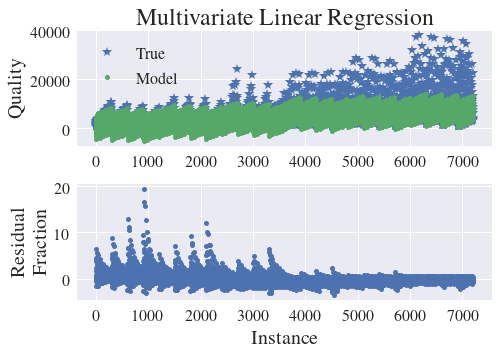

In [35]:
plt.style.use('presentation')
plt.figure(figsize=(7,5))
a = plt.subplot(211)
plt.plot(df.Quality.values,  "*", label="True")
plt.plot(model.values,  ".", label="Model", color="C1")
plt.legend(fontsize=16)
plt.ylabel("Quality")

plt.title("Multivariate Linear Regression")
plt.subplot(212, sharex=a)
plt.plot(res/df.Quality.values, ".")
#plt.legend()
plt.xlabel("Instance")
plt.ylabel("Residual\nFraction")

plt.tight_layout()
plt.savefig("linear_regression_test.pdf")

In [10]:
# LINEAR REGRESION with columns parameters changed

In [11]:
df = pd.read_csv("random_forest/float_quality.csv")

df.columns = df.columns.str.strip()
#df.Resolution = df.Resolution.str.replace("k","").astype(float) * 1000
#df.Band = df.Band.str.strip()
#df = df[df.Band =="K"]
print(df.head())
len(df)

   Temp  logg  [Fe/H]  Alpha  Band  Resolution  vsini  Sampling  Quality  \
0  4200   4.0    -1.0    0.0  0.90       60000    1.0       3.0     2899   
1  4200   4.0    -1.0    0.0  0.90       60000    5.0       3.0     1946   
2  4200   4.0    -1.0    0.0  0.90       60000   10.0       3.0     1141   
3  4200   4.0    -1.0    0.0  1.25       60000    1.0       3.0     1543   
4  4200   4.0    -1.0    0.0  1.25       60000    5.0       3.0     1090   

   Cond1  Cond2  Cond3  correctflag  
0   12.1   20.4   12.6            0  
1   18.1   30.6   18.7            0  
2   30.8   50.2   31.6            0  
3   22.2  111.9   23.5            0  
4   31.4  186.9   33.2            0  


7200

In [12]:
data_table = df[["Temp", "logg", "[Fe/H]", "Resolution", "Band", "vsini"]]
expected = df["Quality"].astype(float)
data_table = data_table.astype(np.float)


In [13]:

# Limit broadening
modified_data_table = datatable
mod_expected = expected
modified_data_table = modified_data_table[modified_data_table["Resolution"]==100000]
modified_data_table = modified_data_table[modified_data_table["vsini"]==1]
mod_expected = mod_expected [modified_data_table["Resolution"]==100000]
mod_expected = mod_expected [modified_data_table["vsini"]==1]

[intercept_, coef_, model, res] = sk_linearReg(modified_data_table, mod_expected)
print(modified_data_table.columns)
print(coef_)


plt.style.use('presentation')
plt.figure(figsize=(7,5))
a = plt.subplot(211)
plt.plot(mod_expected.values,  "*", label="True")
plt.plot(model.values,  ".", label="Model", color="C1")
plt.legend(fontsize=16)
plt.ylabel("Quality")

plt.title("Multivariate Linear Regression")
plt.subplot(212, sharex=a)
plt.plot(res/mod_expected, ".")
#plt.legend()
plt.xlabel("Instance")
plt.ylabel("Residual\nFraction")

plt.tight_layout()
#plt.savefig("linear_regression_test.pdf")

NameError: name 'datatable' is not defined

In [ ]:
# broadening to power 1.5
modified_data_table = datatable
mod_expected = expected
modified_data_table["Resolution"] = modified_data_table["Resolution"] ** 1.5
modified_data_table = modified_data_table[modified_data_table["vsini"]==1]
#mod_expected = mod_expected [modified_data_table["Resolution"]==100000]
mod_expected = mod_expected [modified_data_table["vsini"]==1]


[intercept_, coef_, model, res] = sk_linearReg(modified_data_table, mod_expected)
print(modified_data_table.columns)
print(coef_)

In [ ]:


plt.style.use('presentation')
plt.figure(figsize=(7,5))
a = plt.subplot(211)
plt.plot(mod_expected.values,  "*", label="True")
plt.plot(model.values,  ".", label="Model", color="C1")
plt.legend(fontsize=16)
plt.ylabel("Quality")

plt.title("Multivariate Linear Regression")
plt.subplot(212, sharex=a)
plt.plot(res/mod_expected, ".")
#plt.legend()
plt.xlabel("Instance")
plt.ylabel("Residual\nFraction")

plt.tight_layout()
#plt.savefig("linear_regression_test.pdf")